## NPTA Homework 2 

### Dataset 2: Stroke Prediction Dataset


Attribute information:

* **ID**: unique identifier
* **Gender**: Male/Female (nominal/binary)
* **Age**: Age oo patient (continious)
* **Hypertension**: 0 patient doesnt have, 1 patient has hypertension (binary)
* **Heart_disease**: 0 patient doenst have, 1 patient has any heart diseases (binary)
* **Ever_married**: yes / no (binary)
* **Work_type**: 5 different work types (nominal)
* **Residence_type**: Rural / urban (nominal/binary)
* **Avg_glucose_level**: average glucose level in blood (continious)
* **BMI**: body mass index (continious)
* **Smoking_status**: 4 different types (nominal)
* **Stroke**: 1 if patient has a stroke, 0 if not (binary)

In [2]:
stroke_data <- read.csv("data/healthcare-dataset-stroke-data.csv")
head(stroke_data)
skimr::skim(stroke_data)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>
1,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
3,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
6,56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


── Data Summary ────────────────────────
                           Values     
Name                       stroke_data
Number of rows             5110       
Number of columns          12         
_______________________               
Column type frequency:                
  character                6          
  numeric                  6          
________________________              
Group variables            None       

── Variable type: character ────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate min max empty n_unique whitespace
1 gender                 0             1   4   6     0        3          0
2 ever_married           0             1   2   3     0        2          0
3 work_type              0             1   7  13     0        5          0
4 Residence_type         0             1   5   5     0        2          0
5 bmi                    0             1   2   4     0      419          0
6 smoking_status         0           

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
"'length(x) = 17 > 1' in coercion to 'logical(1)'"


,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,gender,0,1,4,6,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA
2,character,ever_married,0,1,2,3,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA
3,character,work_type,0,1,7,13,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA
4,character,Residence_type,0,1,5,5,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA
5,character,bmi,0,1,2,4,0,419,0,NA,NA,NA,NA,NA,NA,NA,NA
6,character,smoking_status,0,1,6,15,0,4,0,NA,NA,NA,NA,NA,NA,NA,NA
7,numeric,id,0,1,NA,NA,NA,NA,NA,3.651783e+04,2.116172e+04,67.00,17741.250,36932.000,54682.00,72940.00,▇▇▇▇▇
8,numeric,age,0,1,NA,NA,NA,NA,NA,4.322661e+01,2.261265e+01,0.08,25.000,45.000,61.00,82.00,▅▆▇▇▆
9,numeric,hypertension,0,1,NA,NA,NA,NA,NA,9.745597e-02,2.966067e-01,0.00,0.000,0.000,0.00,1.00,▇▁▁▁▁



Attaching package: 'dplyr'


The following object is masked from 'package:ordinal':

    slice


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




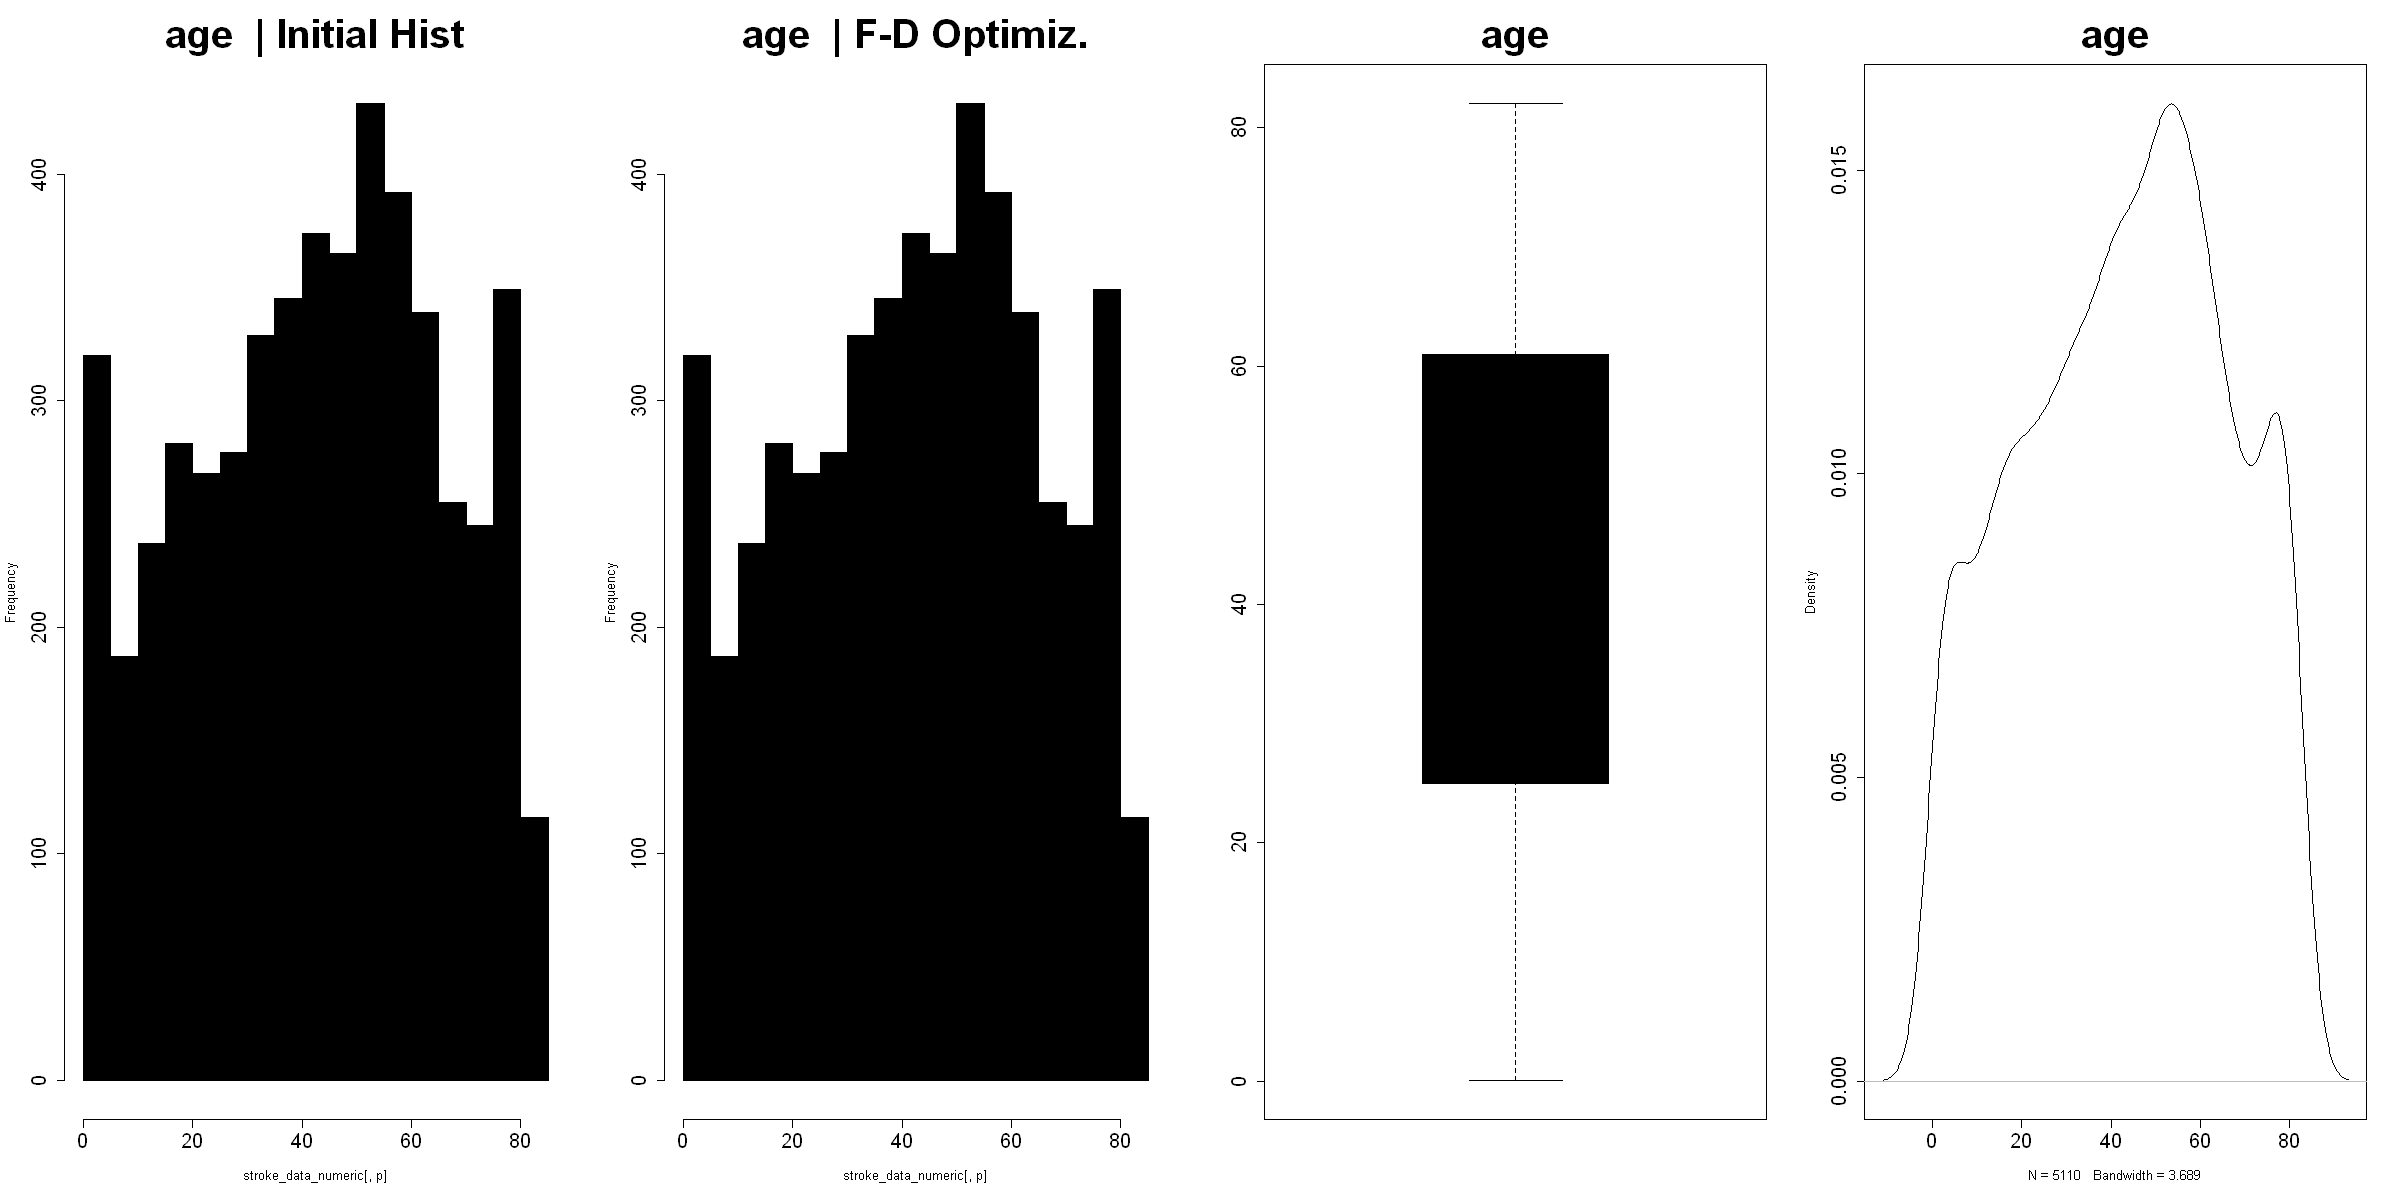

null device 
          1

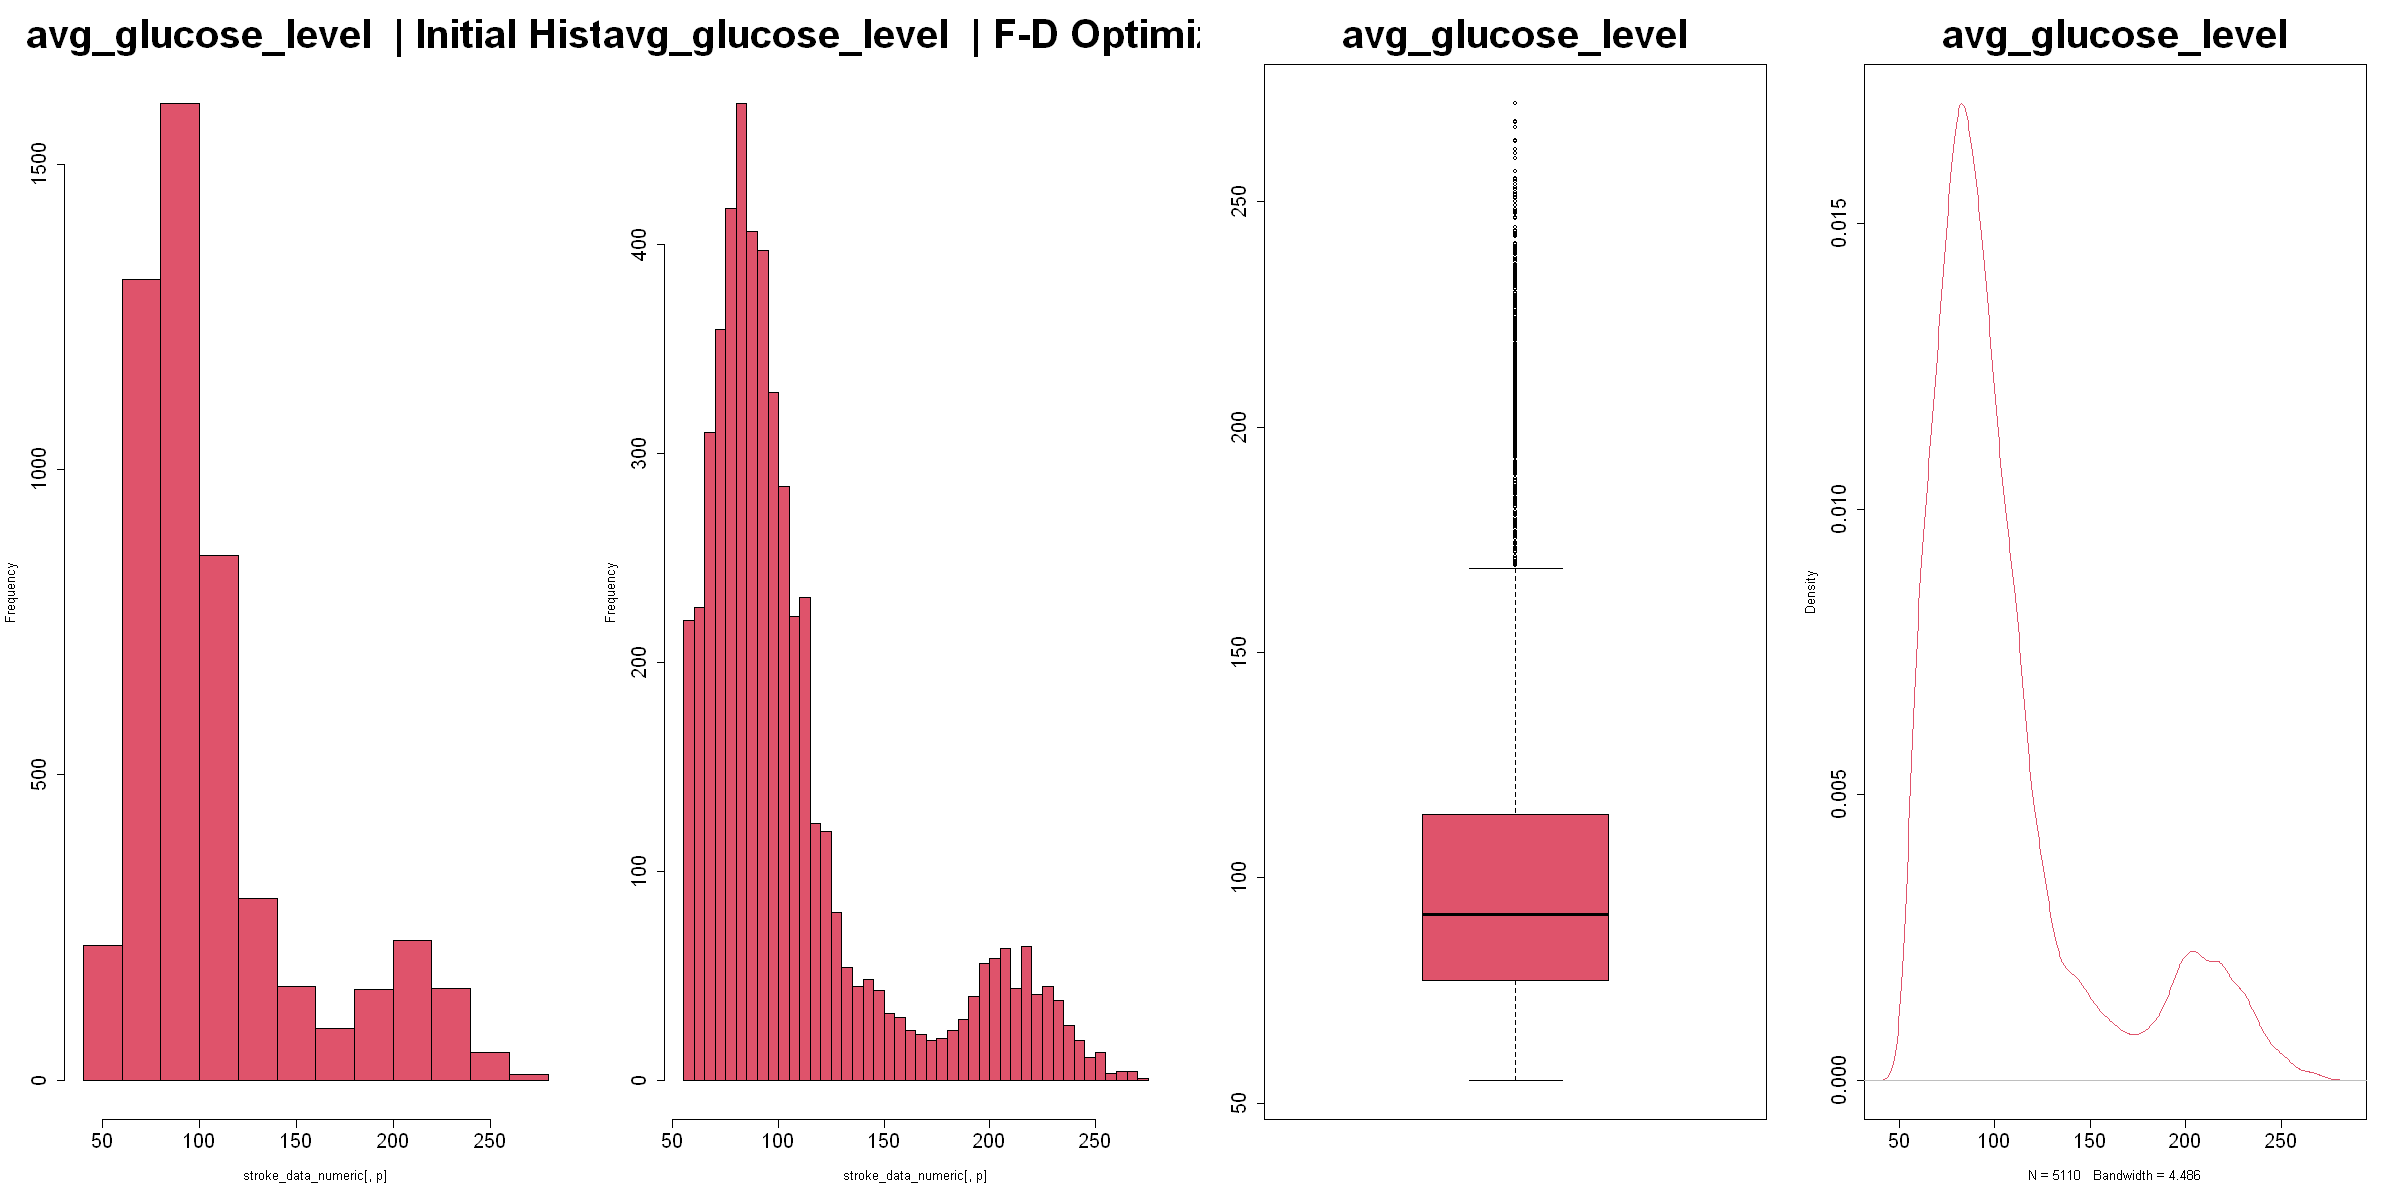

In [3]:
# normality distribution of numeric continious variables
library(dplyr)
stroke_data_numeric <- stroke_data %>%
                select(age, avg_glucose_level)

options(repr.plot.width = 20, repr.plot.height = 10)
par(mfrow = c(1,4), cex.main = 3, cex.axis = 1.5)
for (p in 1:2){
    hist(stroke_data_numeric[,p], main = paste(names(stroke_data_numeric)[p], " | Initial Hist"), col = p)
    hist(stroke_data_numeric[,p], main = paste(names(stroke_data_numeric)[p], " | F-D Optimiz."), col = p, breaks = "Freedman-Diaconis")
    boxplot(stroke_data_numeric[,p], main = names(stroke_data_numeric)[p], col = p)
    plot(density(stroke_data_numeric[,p]), main = names(stroke_data_numeric)[p], col = p)
}

dev.off()

### Data Organization

In [4]:
# converting gender/married/residence into binary
table(stroke_data$gender)

stroke_data2 <- stroke_data[stroke_data$gender != "Other",]
stroke_data2$gender <- ifelse(stroke_data2$gender == "Male", 1, 0)
stroke_data2$ever_married <- ifelse(stroke_data2$ever_married == "Yes", 1, 0)
stroke_data2$Residence_type <- ifelse(stroke_data2$Residence_type == "Urban", 1, 0)

head(stroke_data2)


Female   Male  Other 
  2994   2115      1 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,9046,1,67,0,1,1,Private,1,228.69,36.6,formerly smoked,1
2,51676,0,61,0,0,1,Self-employed,0,202.21,N/A,never smoked,1
3,31112,1,80,0,1,1,Private,0,105.92,32.5,never smoked,1
4,60182,0,49,0,0,1,Private,1,171.23,34.4,smokes,1
5,1665,0,79,1,0,1,Self-employed,0,174.12,24,never smoked,1
6,56669,1,81,0,0,1,Private,1,186.21,29,formerly smoked,1


In [5]:
# joining smoking groups and converting to binary

table(stroke_data2$smoking_status)
stroke_data2 <- stroke_data2[stroke_data2$smoking_status != "Unknown",]

stroke_data2$smoking_status <- ifelse(stroke_data2$smoking_status == "smokes" | stroke_data2$smoking_status == "formerly smoked", 1, 0) 
head(stroke_data2)
skimr::skim(stroke_data2)


formerly smoked    never smoked          smokes         Unknown 
            884            1892             789            1544 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>
1,9046,1,67,0,1,1,Private,1,228.69,36.6,1,1
2,51676,0,61,0,0,1,Self-employed,0,202.21,N/A,0,1
3,31112,1,80,0,1,1,Private,0,105.92,32.5,0,1
4,60182,0,49,0,0,1,Private,1,171.23,34.4,1,1
5,1665,0,79,1,0,1,Self-employed,0,174.12,24,0,1
6,56669,1,81,0,0,1,Private,1,186.21,29,1,1


── Data Summary ────────────────────────
                           Values      
Name                       stroke_data2
Number of rows             3565        
Number of columns          12          
_______________________                
Column type frequency:                 
  character                2           
  numeric                  10          
________________________               
Group variables            None        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 work_type             0             1   7  13     0        5          0
2 bmi                   0             1   2   4     0      371          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable     n_missing complete_rate       mean        sd   p0     p25
 1 id                        0             1 36780.     21241.    67   18040  
 2 gender      

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
"'length(x) = 17 > 1' in coercion to 'logical(1)'"


,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,work_type,0,1,7,13,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA
2,character,bmi,0,1,2,4,0,371,0,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,3.678032e+04,2.124050e+04,67.00,18040.00,37446.00,54946.00,72915.00,▇▇▇▇▇
4,numeric,gender,0,1,NA,NA,NA,NA,NA,3.946704e-01,4.888484e-01,0.00,0.00,0.00,1.00,1.00,▇▁▁▁▅
5,numeric,age,0,1,NA,NA,NA,NA,NA,4.886031e+01,1.887314e+01,10.00,34.00,50.00,63.00,82.00,▃▆▇▇▆
6,numeric,hypertension,0,1,NA,NA,NA,NA,NA,1.251052e-01,3.308846e-01,0.00,0.00,0.00,0.00,1.00,▇▁▁▁▁
7,numeric,heart_disease,0,1,NA,NA,NA,NA,NA,6.395512e-02,2.447073e-01,0.00,0.00,0.00,0.00,1.00,▇▁▁▁▁
8,numeric,ever_married,0,1,NA,NA,NA,NA,NA,7.601683e-01,4.270405e-01,0.00,1.00,1.00,1.00,1.00,▂▁▁▁▇
9,numeric,Residence_type,0,1,NA,NA,NA,NA,NA,5.088359e-01,4.999921e-01,0.00,0.00,1.00,1.00,1.00,▇▁▁▁▇


In [6]:
# dummifying work_type
library(fastDummies)

work_type_b <- dummy_cols(stroke_data2$work_type); head(work_type_b)
summary(work_type_b)

Warning message:
"package 'fastDummies' was built under R version 4.2.3"


,.data,.data_children,.data_Govt_job,.data_Never_worked,.data_Private,.data_Self-employed
,<chr>,<int>,<int>,<int>,<int>,<int>
1,Private,0,0,0,1,0
2,Self-employed,0,0,0,0,1
3,Private,0,0,0,1,0
4,Private,0,0,0,1,0
5,Self-employed,0,0,0,0,1
6,Private,0,0,0,1,0


    .data           .data_children    .data_Govt_job   .data_Never_worked
 Length:3565        Min.   :0.00000   Min.   :0.0000   Min.   :0.000000  
 Class :character   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.000000  
 Mode  :character   Median :0.00000   Median :0.0000   Median :0.000000  
                    Mean   :0.01935   Mean   :0.1501   Mean   :0.003927  
                    3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:0.000000  
                    Max.   :1.00000   Max.   :1.0000   Max.   :1.000000  
 .data_Private    .data_Self-employed
 Min.   :0.0000   Min.   :0.000      
 1st Qu.:0.0000   1st Qu.:0.000      
 Median :1.0000   Median :0.000      
 Mean   :0.6407   Mean   :0.186      
 3rd Qu.:1.0000   3rd Qu.:0.000      
 Max.   :1.0000   Max.   :1.000      

In [7]:
# extracting binary data from original dataset and combining with dummies

stroke_data_b <- data.frame(stroke_data2[, c("gender", "Residence_type", "ever_married", "hypertension", "heart_disease", "smoking_status", "stroke")])
stroke_data_b <- as.matrix(cbind(work_type_b[-1], stroke_data_b))
is.matrix(stroke_data_b)

[1] TRUE

The second dataset comprises health information data, which consists mostly of binary and nominal variables, the latter are intended to be converted into binary form. There are also two continuous variables included in the dataset: age and average glucose level. The distribution of age is approximately normal, while the distribution of average glucose level is skewed to the right.In this case, the binary MCMC coupled-Metropolis method appears to be the most appropriate clustering technique. This is because it is designed to consider the binary nature of the data, resulting in more efficient clustering results, as the name suggests. In contrast, the median and probability density methods are not applicable, as they assume that the variables are continuous. Instead, the data can be clustered using the average glucose variable, while the normally distributed age variable is not suitable.


### Binary MCMC coupled-Metropolis Clustering

The first attempt of clustering using MCMC method, was to generate the parameters we discussed in the lectures, increasing the number of iterations to 175 and the heat to 75 as recommended. 

In [8]:
library(BayesBinMix)

#cm1 <- coupledMetropolis(Kmax = 6, 
#                   nChains = 5,
#                   heats = seq(1, 0.4, length = 5),
#                   binaryData = stroke_data_b,
#                   outPrefix = "stroke_cm1",
#                   ClusterPrior = "uniform",
#                   m = 175,
#                   burn = 75 
#)


Warning message:
"package 'BayesBinMix' was built under R version 4.2.3"


In [9]:
# saveRDS(cm1, "cm1.rds")
cm1 <- readRDS("cm1.rds")

print(cm1)  # model proposing 6 cluster with probability of 1, but swap acceptance rate is horrible
head(cm1$clusterMembershipPerMethod)


* Run information: 
      Number of parallel heated chains: 5 
      Swap acceptance rate: 1.1% 
      Total number of iterations: 1750 
      Burn-in period: 750 
      Thinning: 10. 

* Estimated posterior distribution of the number of clusters: 

6 
1 

* Most probable model: K = 6 with P(K = 6|data) = 1 

* Estimated number of observations per cluster conditionally on K = 6 (3 label switching algorithms): 
  STEPHENS  ECR ECR.ITERATIVE.1
1       14   14              14
2     1906 1906            1906
3      663  663             663
4      378  378             378
5       69   69              69
6      535  535             535

* Posterior mean of probability of success per feature and cluster (ECR algorithm): 
         cluster_1    cluster_2   cluster_3   cluster_4  cluster_5   cluster_6
theta_1 0.05974693 0.0006461734 0.001526105 0.001325966 0.98540763 0.002041778
theta_2 0.06158534 0.0006837229 0.001593672 0.001618692 0.01302044 0.998048367
theta_3 0.92470553 0.0006370308 0.0014

,STEPHENS,ECR,ECR.ITERATIVE.1
,<int>,<int>,<int>
z.1,4,4,4
z.2,3,3,3
z.3,4,4,4
z.4,4,4,4
z.5,3,3,3
z.6,4,4,4


The result revealed that there are 6 clusters with a probability of 1, which is an excellent outcome. However, the swap acceptance rate was much lower than the expected optimal value (1 %).

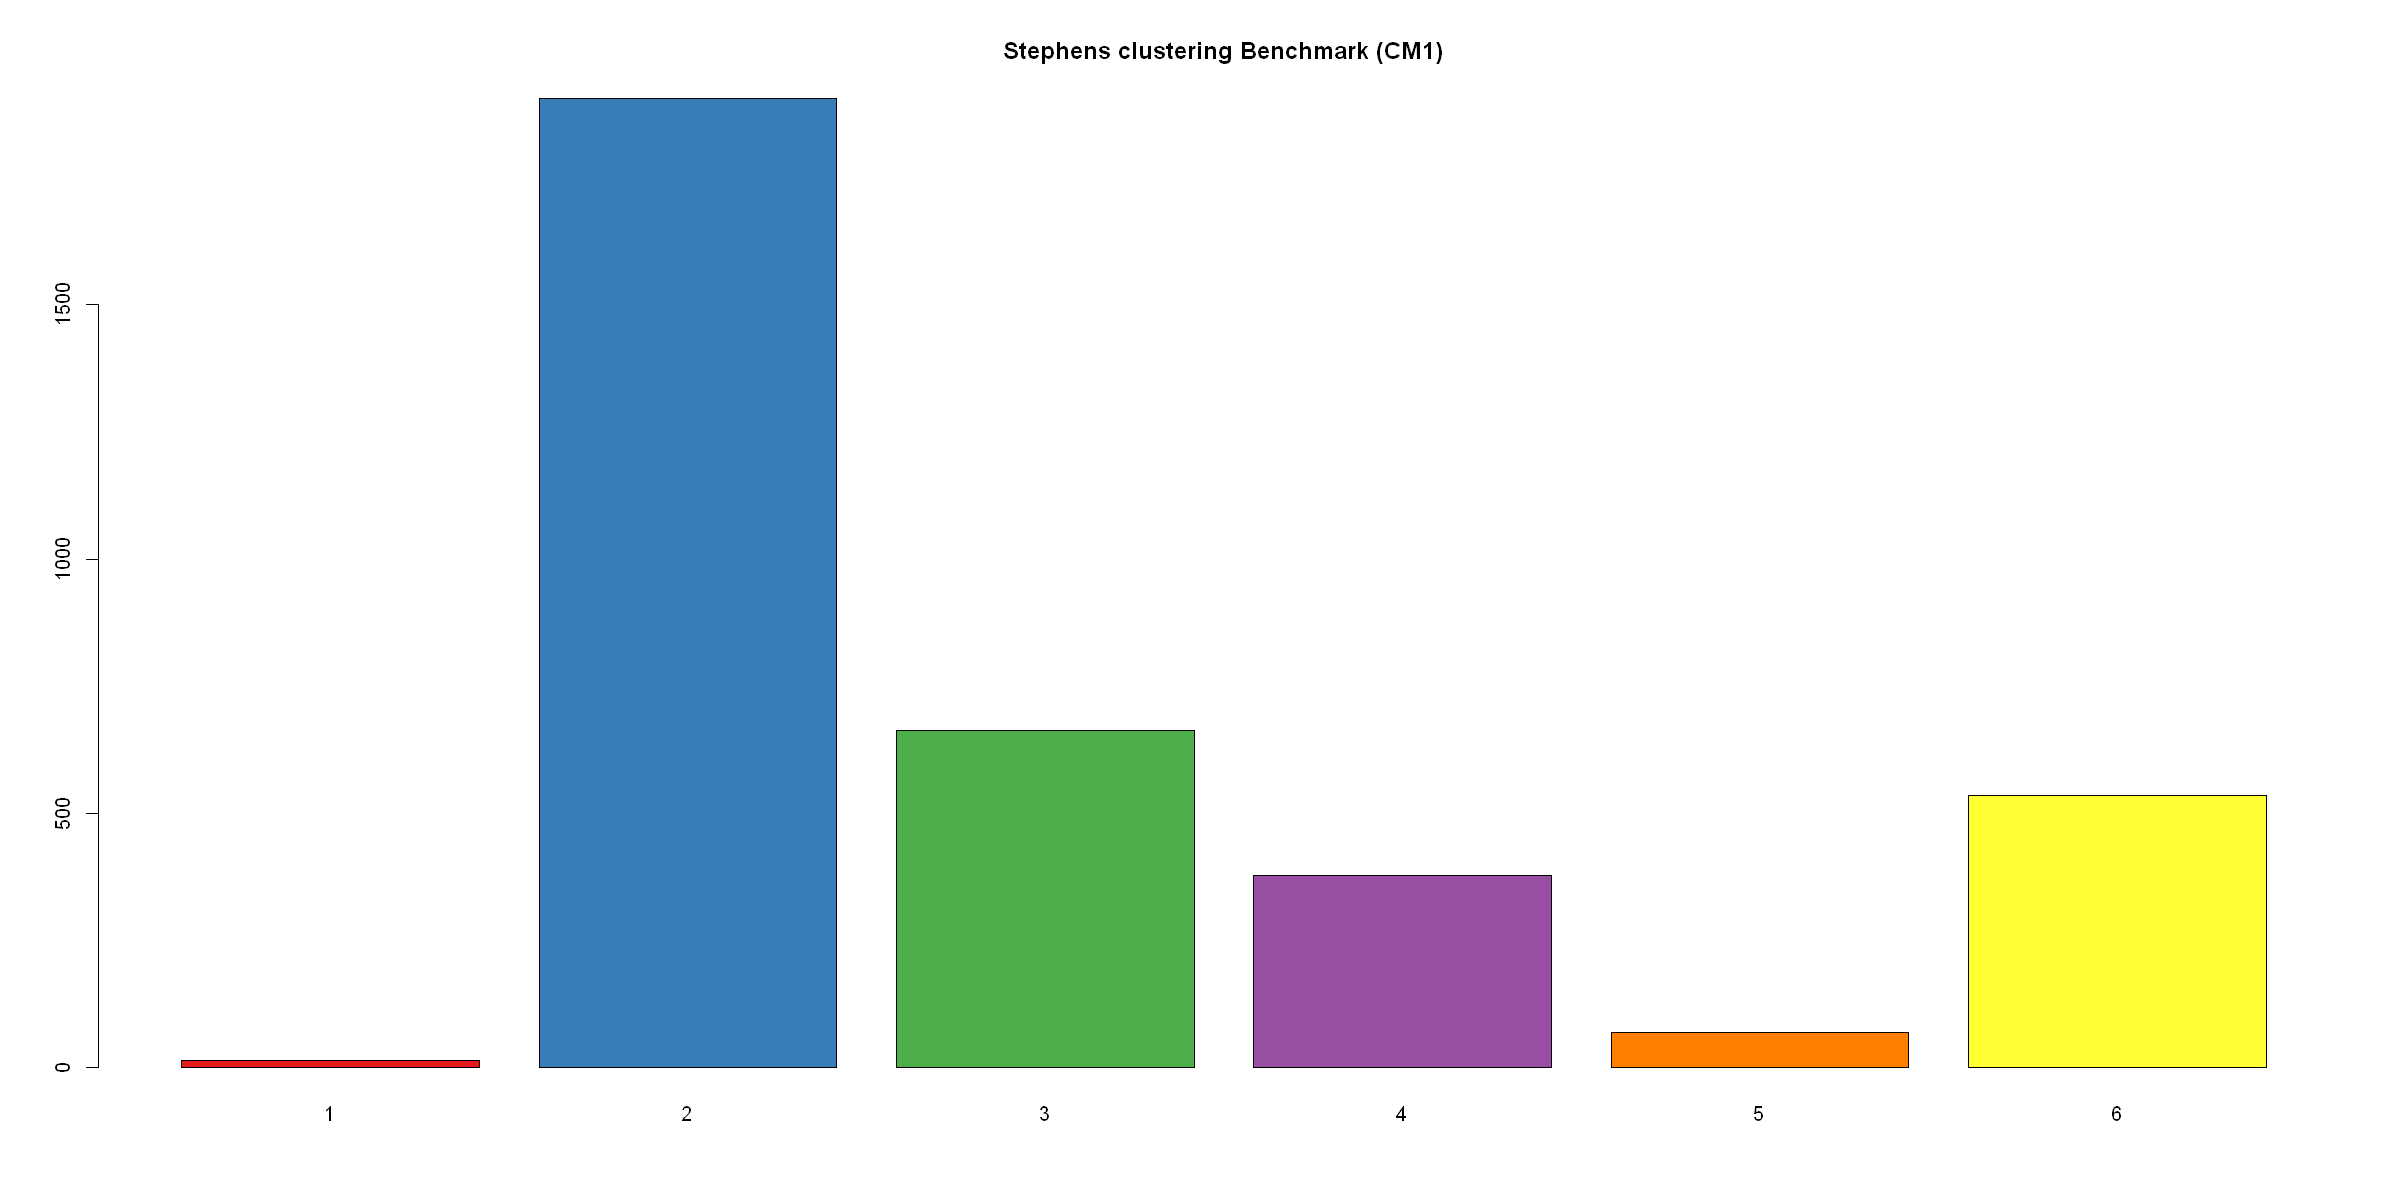

In [10]:
library(RColorBrewer)
barplot(table(cm1$clusterMembershipPerMethod[,1]), main = "Stephens clustering Benchmark (CM1)", col = brewer.pal(6, name = 'Set1'))

Upon further investigation using a barplot with Stephen benchmark, it became apparent that the distribution of the clusters are remarkably unevenly distributed. Specifically, at least two clusters have substantially lower values (14 and 69) compared to the largest cluster, which consists of roughly 2000 units. That is why, in the next step I decided to limit the upper limit of numbers of clusters to 3, hoping that the swap acceptance rate will improve with this. 

In [11]:
#cm11 <- coupledMetropolis(Kmax = 3, 
#                   nChains = 12,
#                   heats = seq(1, 0.7, length = 12),
#                   binaryData = stroke_data_b,
#                   outPrefix = "stroke_cm11",
#                   ClusterPrior = "uniform",
#                   m = 175,
#                   burn = 75 
#)

In [12]:
# saveRDS(cm11, "cm11.rds")
cm11 <- readRDS("cm11.rds")

print(cm11)
str(cm11)


* Run information: 
      Number of parallel heated chains: 12 
      Swap acceptance rate: 26.3% 
      Total number of iterations: 1750 
      Burn-in period: 750 
      Thinning: 10. 

* Estimated posterior distribution of the number of clusters: 

3 
1 

* Most probable model: K = 3 with P(K = 3|data) = 1 

* Estimated number of observations per cluster conditionally on K = 3 (3 label switching algorithms): 
  STEPHENS  ECR ECR.ITERATIVE.1
1      663  663             663
2     2284 2284            2284
3      618  618             618

* Posterior mean of probability of success per feature and cluster (ECR algorithm): 
          cluster_1    cluster_2   cluster_3
theta_1 0.001231707 0.0004661406 0.115905477
theta_2 0.001536053 0.0004592309 0.864172223
theta_3 0.001631467 0.0003682952 0.024405697
theta_4 0.001541403 0.9995783910 0.001670661
theta_5 0.998544070 0.0003994863 0.002000903
   <+ 7 more rows> 
List of 7
 $ K.mcmc                         : 'mcmc' num [1:100] 3 3 3 3 3 3 3 

The analysis revealed that the current approach was insufficient, but despite this, the probability of dividing the elements into three clusters was 1, as anticipated. Additionally, the number of data points in the resulting clusters was also larger. In the following, it was necessary to adjust the parameters related to the number of chains and heats used. Upon manipulating these parameters, it became evident that increasing the temperature of the chain was required, leading to a significant improvement in the swap acceptance rate. Given the significant time consuming involved, I opted to stop the analysis once the swap acceptance rate had reached 26%, which is still considered to be a satisfactory outcome. The results of the analysis indicate a high probability of 1 clustering the units into three groups.


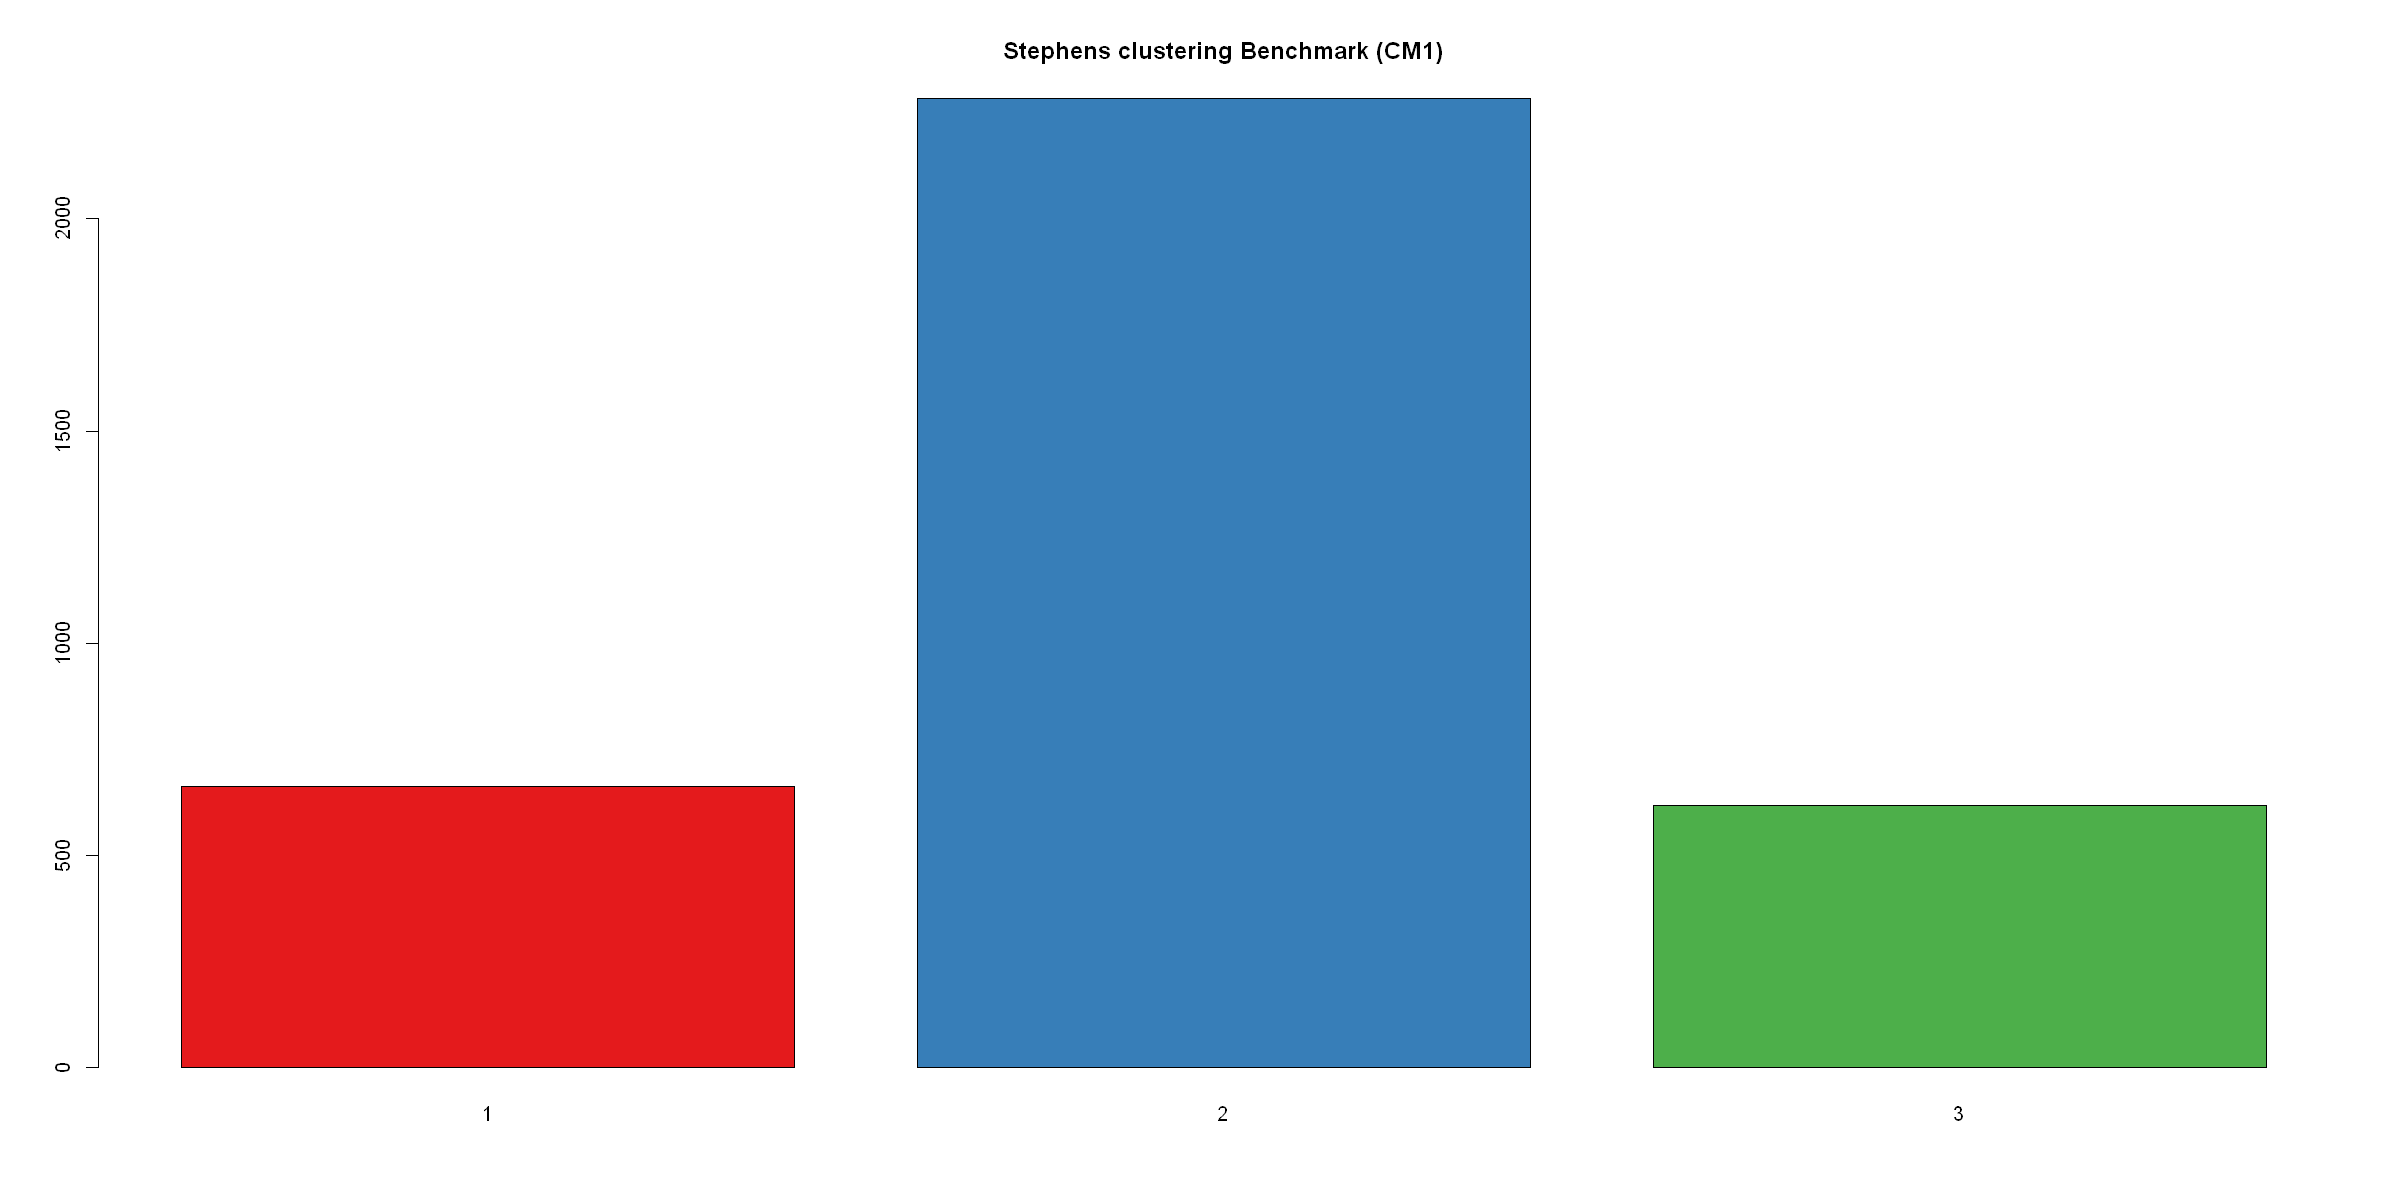

In [13]:
barplot(table(cm11$clusterMembershipPerMethod[,1]), main = "Stephens clustering Benchmark (CM1)", col = brewer.pal(6, name = 'Set1'))

### LogLinear Modelling

In the first model, I used the average glucose levels of the participants as the outcome variable, while taking into account selected demographic and health factors as predictors.

In [14]:
library("MASS")
library("erer")
library("ordinal")
library("nnet")
library("questionr")
library("margins")
library("eMLEloglin")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  55.12   77.25   91.89  106.15  114.09  271.74 

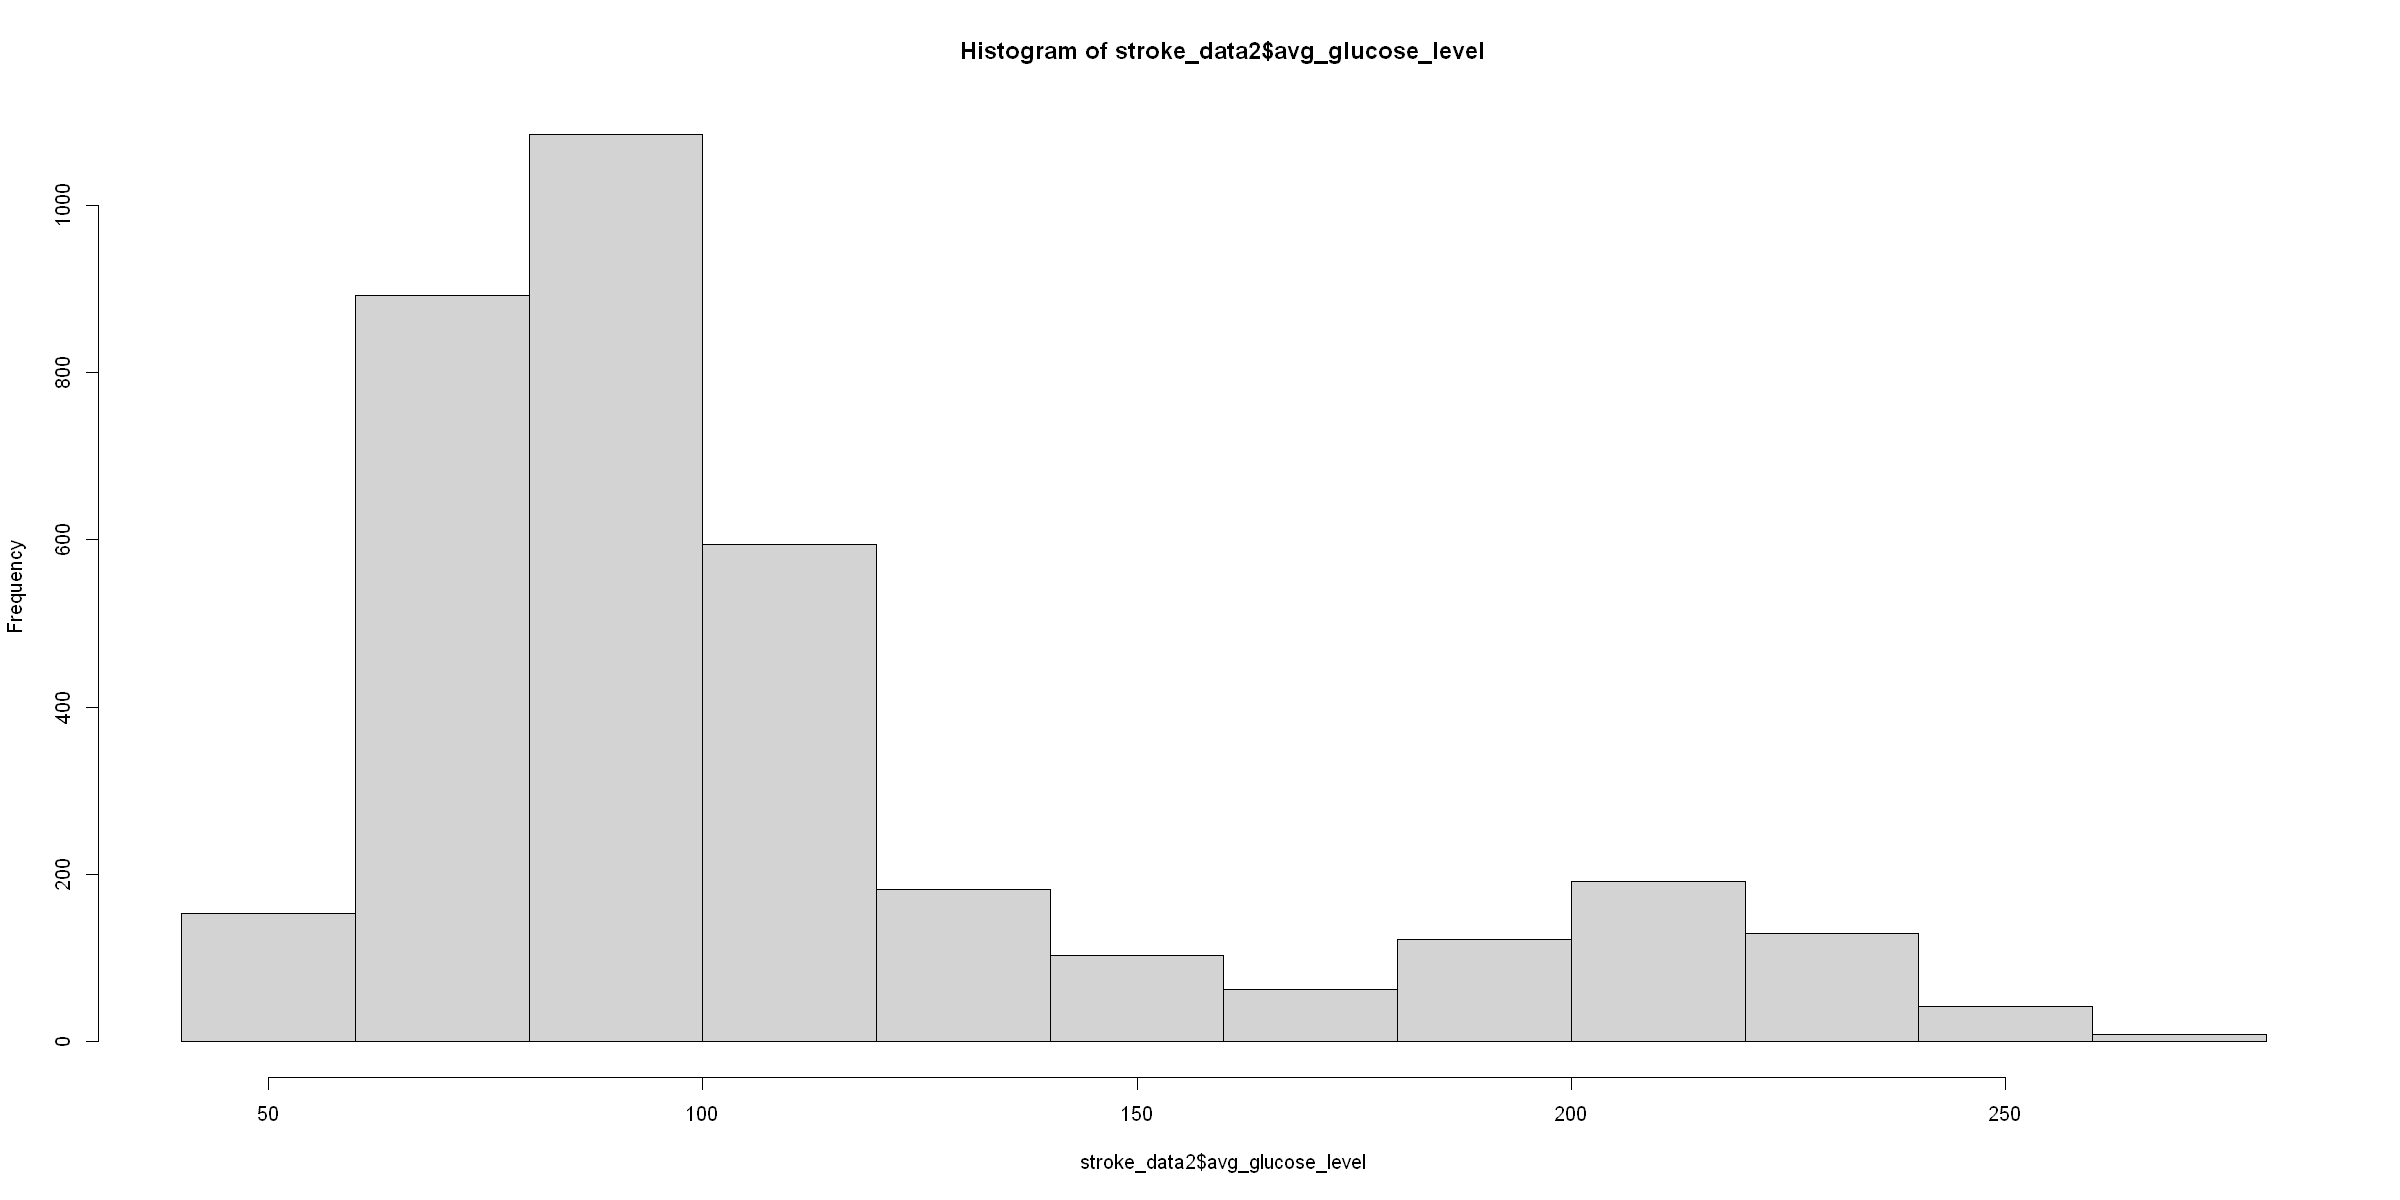

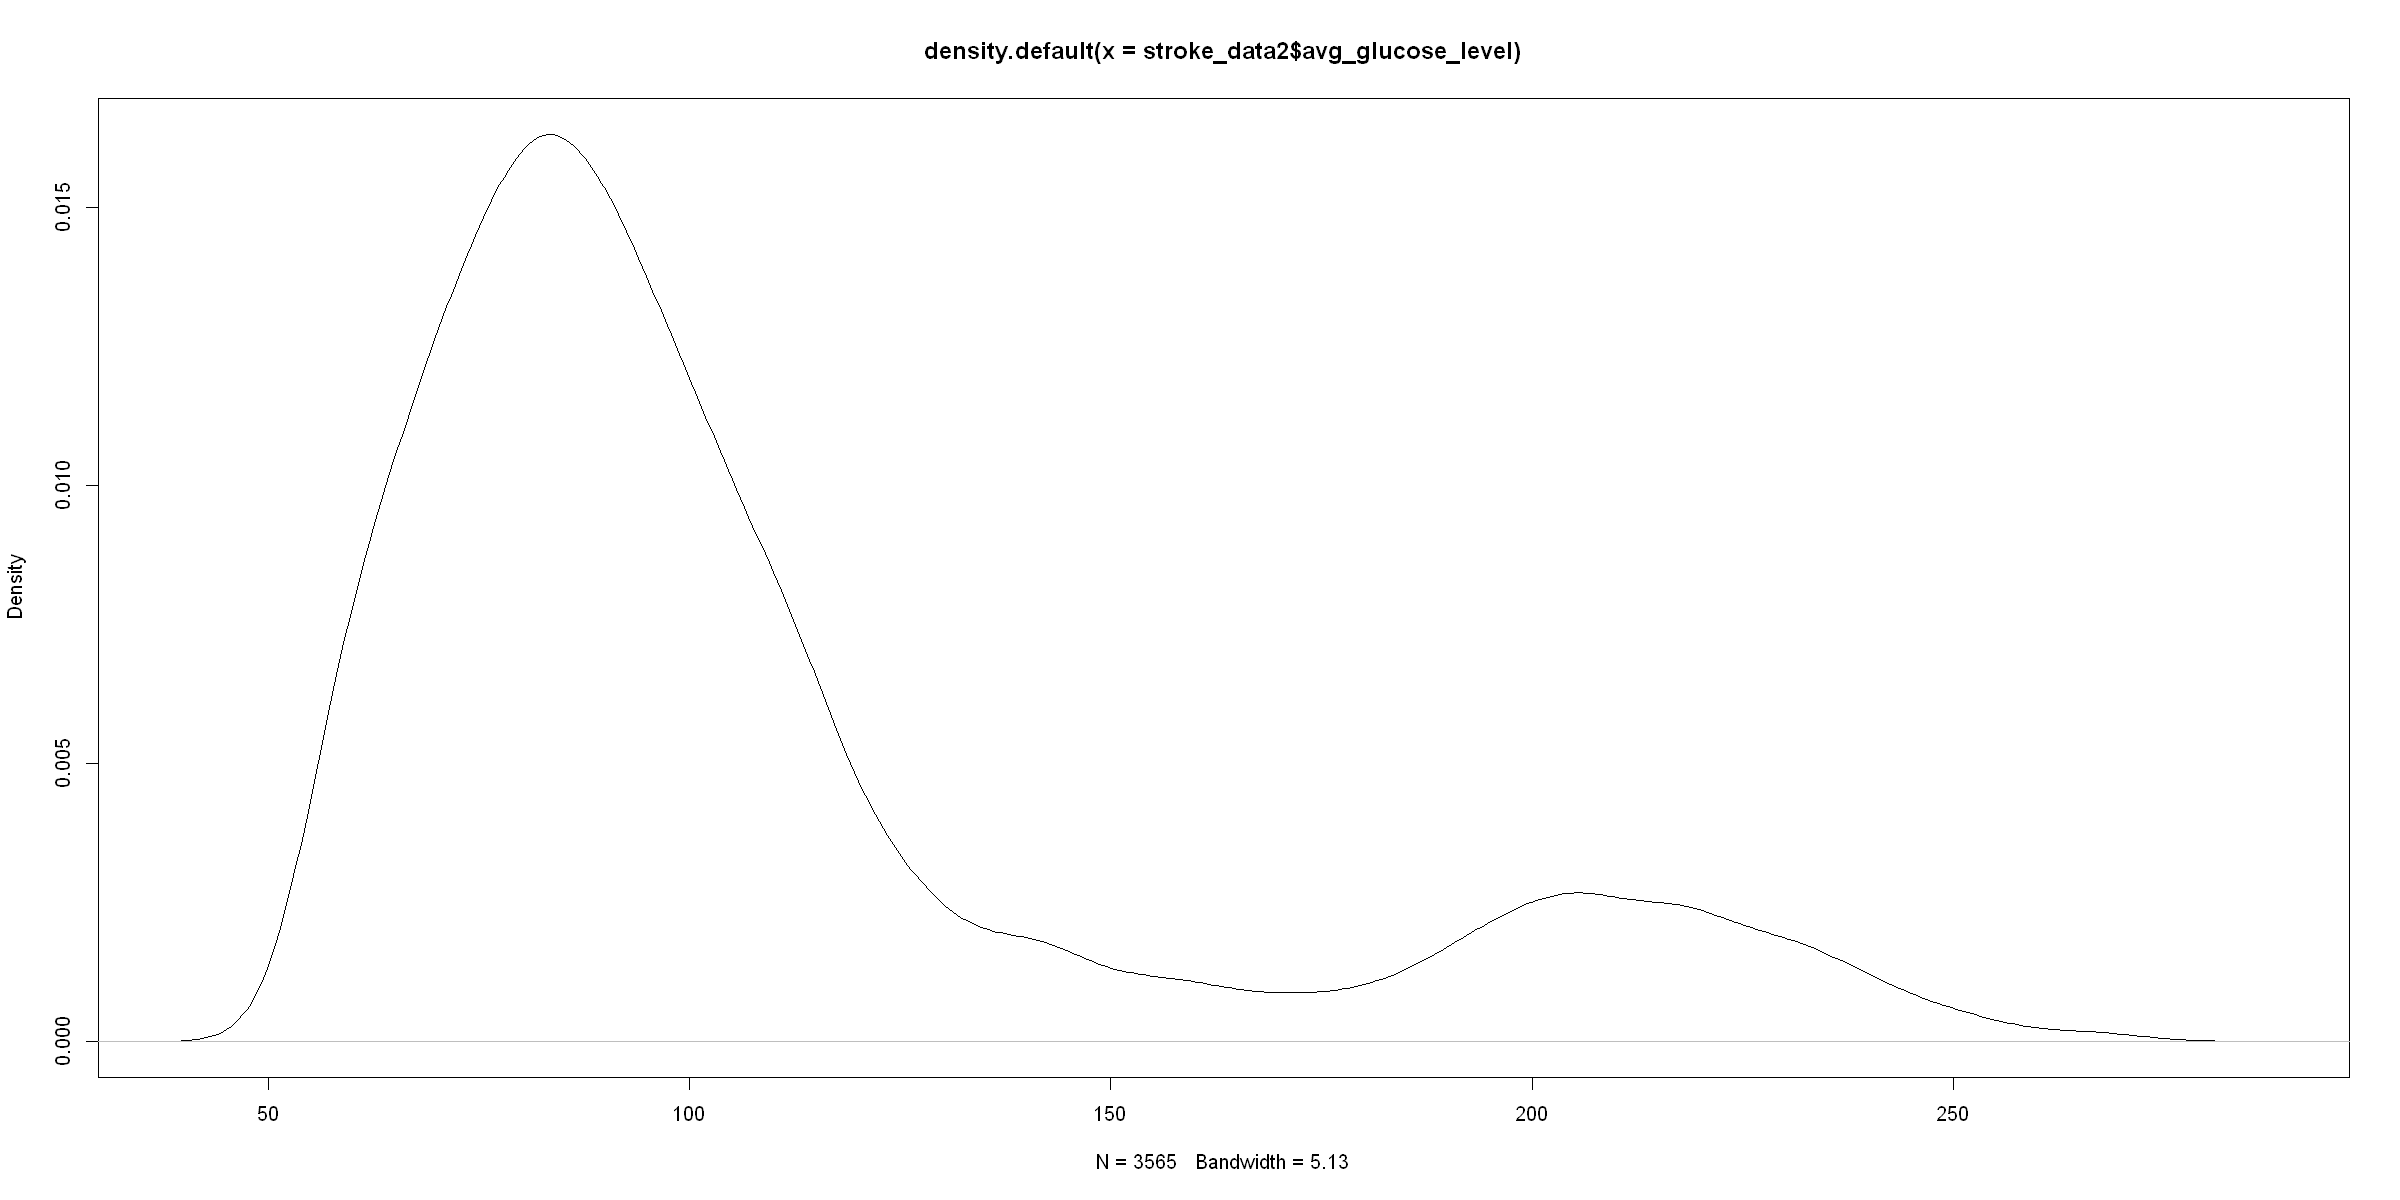

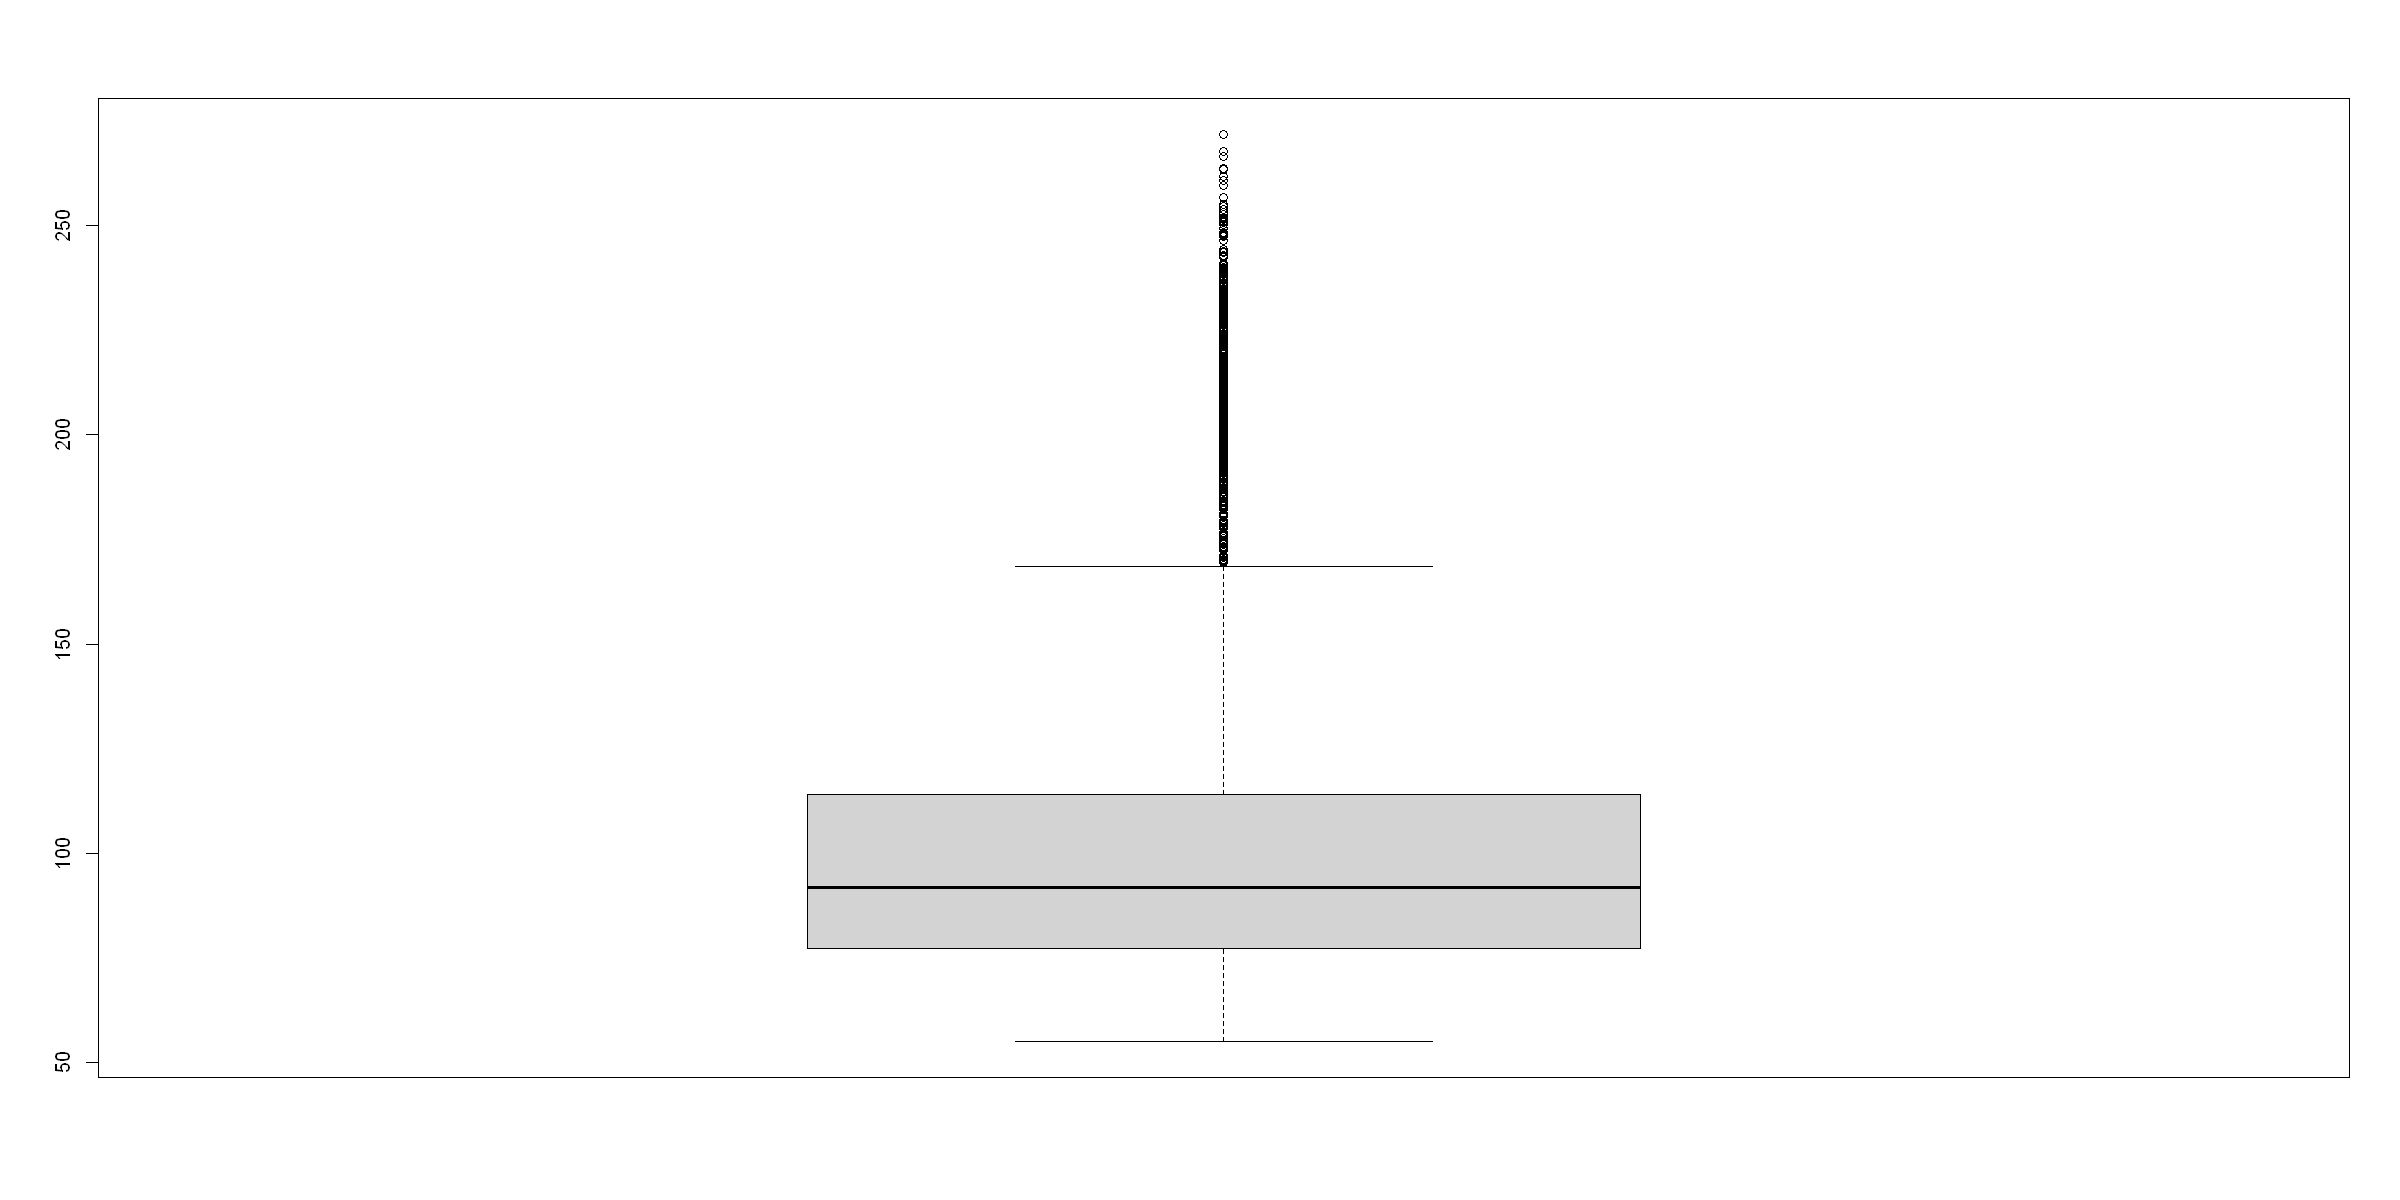

In [59]:
summary(stroke_data$avg_glucose_level)
hist(stroke_data2$avg_glucose_level)
plot(density(stroke_data2$avg_glucose_level))
boxplot(stroke_data$avg_glucose_level)

Prior to modeling, I examined the distribution of the predictor variable and observed that it had a positive skewness with heavier tail and a higher peak than a normal distribution. This suggested that the variable may follow an inverse Gaussian distribution. 

In [29]:
head(stroke_data2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>
1,9046,1,67,0,1,1,Private,1,228.69,36.6,1,1
2,51676,0,61,0,0,1,Self-employed,0,202.21,N/A,0,1
3,31112,1,80,0,1,1,Private,0,105.92,32.5,0,1
4,60182,0,49,0,0,1,Private,1,171.23,34.4,1,1
5,1665,0,79,1,0,1,Self-employed,0,174.12,24,0,1
6,56669,1,81,0,0,1,Private,1,186.21,29,1,1


In [129]:
# continuous var as dependent

llm1 <- glm(avg_glucose_level ~ gender + hypertension + heart_disease + ever_married + Residence_type + smoking_status + stroke, data = stroke_data2, family = inverse.gaussian(link = 'log'))
summary(llm1)


Call:
glm(formula = avg_glucose_level ~ gender + hypertension + heart_disease + 
    ever_married + Residence_type + smoking_status + stroke, 
    family = inverse.gaussian(link = "log"), data = stroke_data2)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.08364  -0.03166  -0.01361   0.01015   0.10961  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.559790   0.016936 269.241  < 2e-16 ***
gender          0.044821   0.014548   3.081  0.00208 ** 
hypertension    0.161074   0.023293   6.915 5.52e-12 ***
heart_disease   0.183079   0.032446   5.643 1.81e-08 ***
ever_married    0.096723   0.016144   5.991 2.29e-09 ***
Residence_type -0.015812   0.014025  -1.127  0.25967    
smoking_status  0.005128   0.014209   0.361  0.71819    
stroke          0.144734   0.033858   4.275 1.96e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.001622

Based on the model output, we can state with 99% confidence that an individual's average glucose level is significantly associated by their gender, marital status, the presence of hypertension, heart disease, stroke in the population. All of these factors have positive coefficients, suggesting a positive association in predicting glucose levels. Since all the independent variables are on the same scale, we can compare the coefficients to determine which variable has the greatest influence on glucose levels. Our analysis reveals that the presence of heart disease has the strongest impact on glucose levels among all the variables considered, indicating that for every one-unit increase in the presence of heart disease, the average glucose level is expected to increase by 0.18 units, all other variables being held constant. In terms of reference group, the expected average glucose levels of around is to be expected for single males with no hypertension, heart disease and probability of stroke. Although these results are promising, I decided to optimize the distribution of the response variable further by removing values above 85% and using a kernel optimization algorithm. 

In [130]:
stepAIC(llm1, method = 'both')

Start:  AIC=35818.73
avg_glucose_level ~ gender + hypertension + heart_disease + ever_married + 
    Residence_type + smoking_status + stroke

                 Df Deviance   AIC
- smoking_status  1   4.7016 35817
- Residence_type  1   4.7035 35818
<none>                4.7014 35819
- gender          1   4.7169 35826
- stroke          1   4.7348 35837
- ever_married    1   4.7568 35851
- heart_disease   1   4.7618 35854
- hypertension    1   4.7887 35871

Step:  AIC=35816.89
avg_glucose_level ~ gender + hypertension + heart_disease + ever_married + 
    Residence_type + stroke

                 Df Deviance   AIC
- Residence_type  1   4.7036 35816
<none>                4.7016 35817
- gender          1   4.7178 35825
- stroke          1   4.7351 35836
- ever_married    1   4.7580 35850
- heart_disease   1   4.7627 35853
- hypertension    1   4.7887 35869

Step:  AIC=35816.4
avg_glucose_level ~ gender + hypertension + heart_disease + ever_married + 
    stroke

                Df Deviance 


Call:  glm(formula = avg_glucose_level ~ gender + hypertension + heart_disease + 
    ever_married + stroke, family = inverse.gaussian(link = "log"), 
    data = stroke_data2)

Coefficients:
  (Intercept)         gender   hypertension  heart_disease   ever_married  
      4.55393        0.04570        0.16089        0.18281        0.09665  
       stroke  
      0.14455  

Degrees of Freedom: 3564 Total (i.e. Null);  3559 Residual
Null Deviance:	    5.061 
Residual Deviance: 4.704 	AIC: 35820

[1] 1781   12

[1] 891  12

[1] 535  12

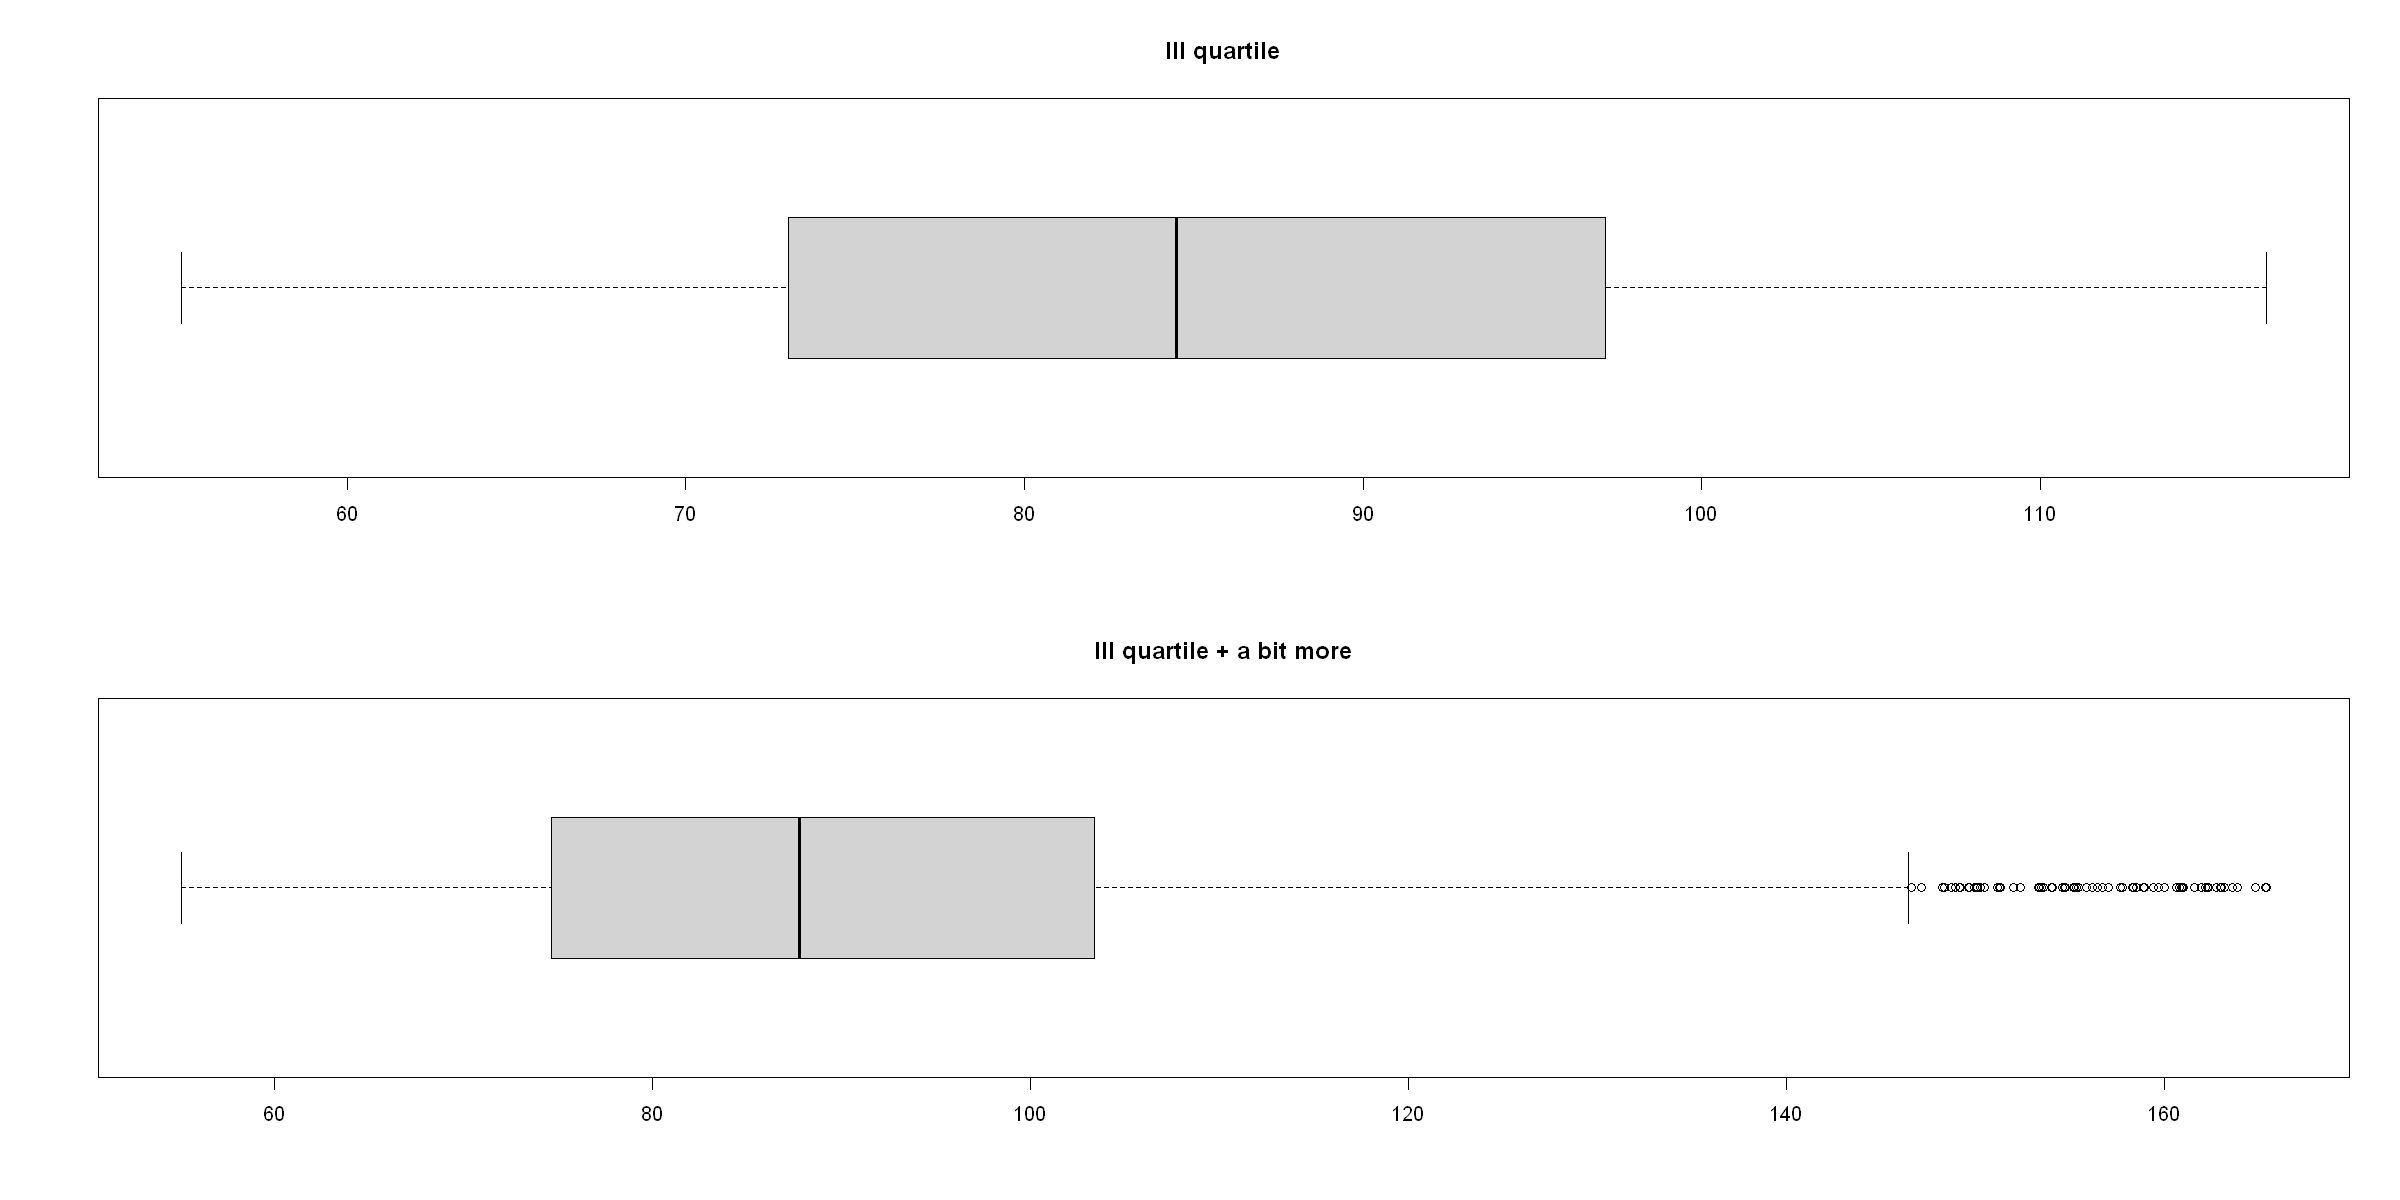

In [85]:
# tunning the dist of response variable

dim(subset(stroke_data2, avg_glucose_level > median(avg_glucose_level)))


gluc_q1 <- quantile(stroke_data2$avg_glucose_level, prob=c(.25)) # I quartile
gluc_q3 <- quantile(stroke_data2$avg_glucose_level, prob=c(.75)) # III quartile
gluc_q3.5 <- quantile(stroke_data2$avg_glucose_level, prob=c(.85)) # III quartile + a bit more
dim(subset(stroke_data2, avg_glucose_level > gluc_q3))
dim(subset(stroke_data2, avg_glucose_level > gluc_q3.5))

par(mfrow = c(2,1))
boxplot(stroke_data2$avg_glucose_level[stroke_data2$avg_glucose_level < gluc_q3], horizontal = TRUE  , main = "III quartile")
boxplot(stroke_data2$avg_glucose_level[stroke_data2$avg_glucose_level < gluc_q3.5], horizontal = TRUE, main = "III quartile + a bit more")

In [79]:
stroke_data3 <- subset(stroke_data2, avg_glucose_level < gluc_q3.5)
dim(stroke_data3)

[1] 3030   12

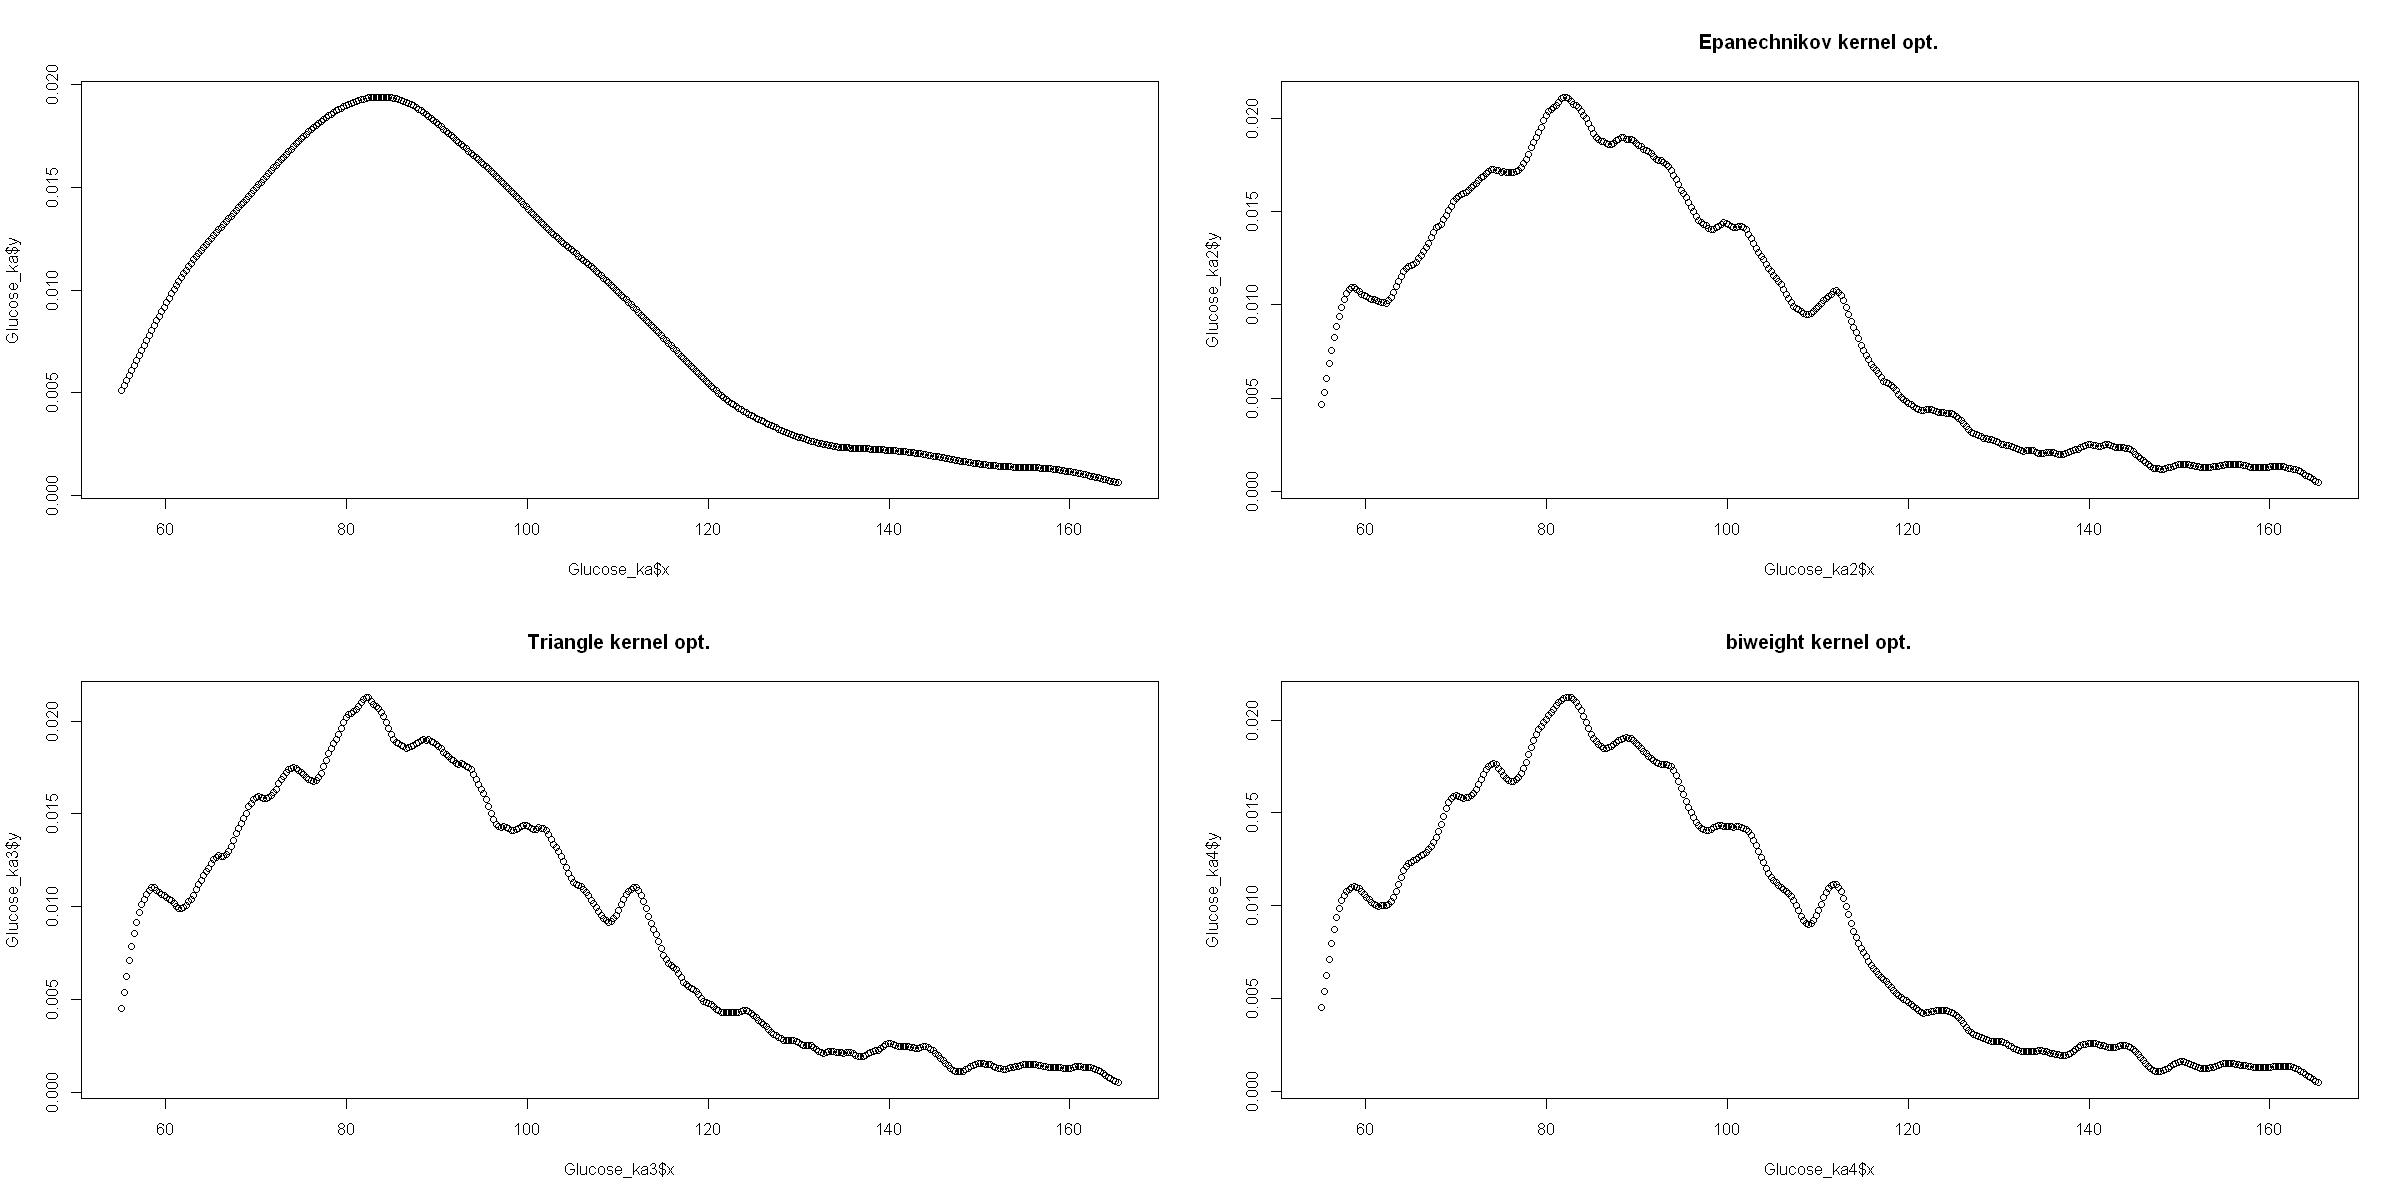

In [84]:
# kernel optimization
library(gplm) 

Glucose_ka  <- kde(stroke_data3$avg_glucose_level)
Glucose_ka2 <- kde(stroke_data3$avg_glucose_level, bandwidth= 3, kernel="epanechnikov")
Glucose_ka3 <- kde(stroke_data3$avg_glucose_level, bandwidth= 3, kernel="triangle")
Glucose_ka4 <- kde(stroke_data3$avg_glucose_level, bandwidth= 3, kernel="biweight")
par(mfrow = c(2,2))
plot(Glucose_ka)
plot(Glucose_ka2, main = "Epanechnikov kernel opt.")
plot(Glucose_ka3, main = "Triangle kernel opt.")
plot(Glucose_ka4, main = "biweight kernel opt.")

In [133]:
llm1.2 <- glm(avg_glucose_level ~ gender + hypertension + heart_disease + ever_married + Residence_type + smoking_status + stroke, data = stroke_data3, family = inverse.gaussian(link = 'log'))
summary(llm1.2)


Call:
glm(formula = avg_glucose_level ~ gender + hypertension + heart_disease + 
    ever_married + Residence_type + smoking_status + stroke, 
    family = inverse.gaussian(link = "log"), data = stroke_data3)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.053616  -0.020626  -0.003652   0.013381   0.065014  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.5051166  0.0107333 419.732   <2e-16 ***
gender          0.0178725  0.0091997   1.943   0.0521 .  
hypertension   -0.0067275  0.0150320  -0.448   0.6545    
heart_disease  -0.0008065  0.0212365  -0.038   0.9697    
ever_married    0.0061513  0.0101724   0.605   0.5454    
Residence_type -0.0099988  0.0088545  -1.129   0.2589    
smoking_status -0.0016152  0.0089632  -0.180   0.8570    
stroke         -0.0009854  0.0220500  -0.045   0.9644    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family t

However, when I built the same model on the revised distribution, it performed worse. This is evident from the non-significant variables, although the intercept remained significant with a p-value of less than .001. further examination would be needed. 

In the second model, we used the same set of binary variables as in the first model to predict the probability of a stroke occurrence.

In [38]:
# categorical-binary as dependent var 

llm2 <- glm(stroke ~ gender + hypertension + heart_disease + ever_married + Residence_type + smoking_status, data = stroke_data2, family = binomial(link = 'logit'))
summary(llm2)


Call:
glm(formula = stroke ~ gender + hypertension + heart_disease + 
    ever_married + Residence_type + smoking_status, family = binomial(link = "logit"), 
    data = stroke_data2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9142  -0.3297  -0.2967  -0.2196   2.8264  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.97552    0.25021 -15.889  < 2e-16 ***
gender         -0.03648    0.15224  -0.240  0.81061    
hypertension    1.05062    0.16610   6.325 2.53e-10 ***
heart_disease   1.14176    0.20138   5.670 1.43e-08 ***
ever_married    0.82785    0.23748   3.486  0.00049 ***
Residence_type  0.04640    0.14821   0.313  0.75423    
smoking_status  0.25251    0.15023   1.681  0.09281 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1552.1  on 3564  degrees of freedom
Residual deviance: 1452.1  on 3558  degrees of freedom
AIC

Our analysis showed that out of the set of predictors, hypertension, heart disease, and marital status had a significant impact on predicting the stroke occurrence with a p-value of almost 0. Specifically, we found that heart disease had the greatest effect on the likelihood of a stroke. For every one unit increase in heart disease, the probability of a stroke occurrence increased by 1.14.
Given that all predictor variables are binary, the intercept in this generalized linear model can be interpreted as the expected log odds of having a stroke for a reference group. This reference group consists of individuals who have no hypertension, heart disease, and are not married. The calculated value for this intercept is -3.98.

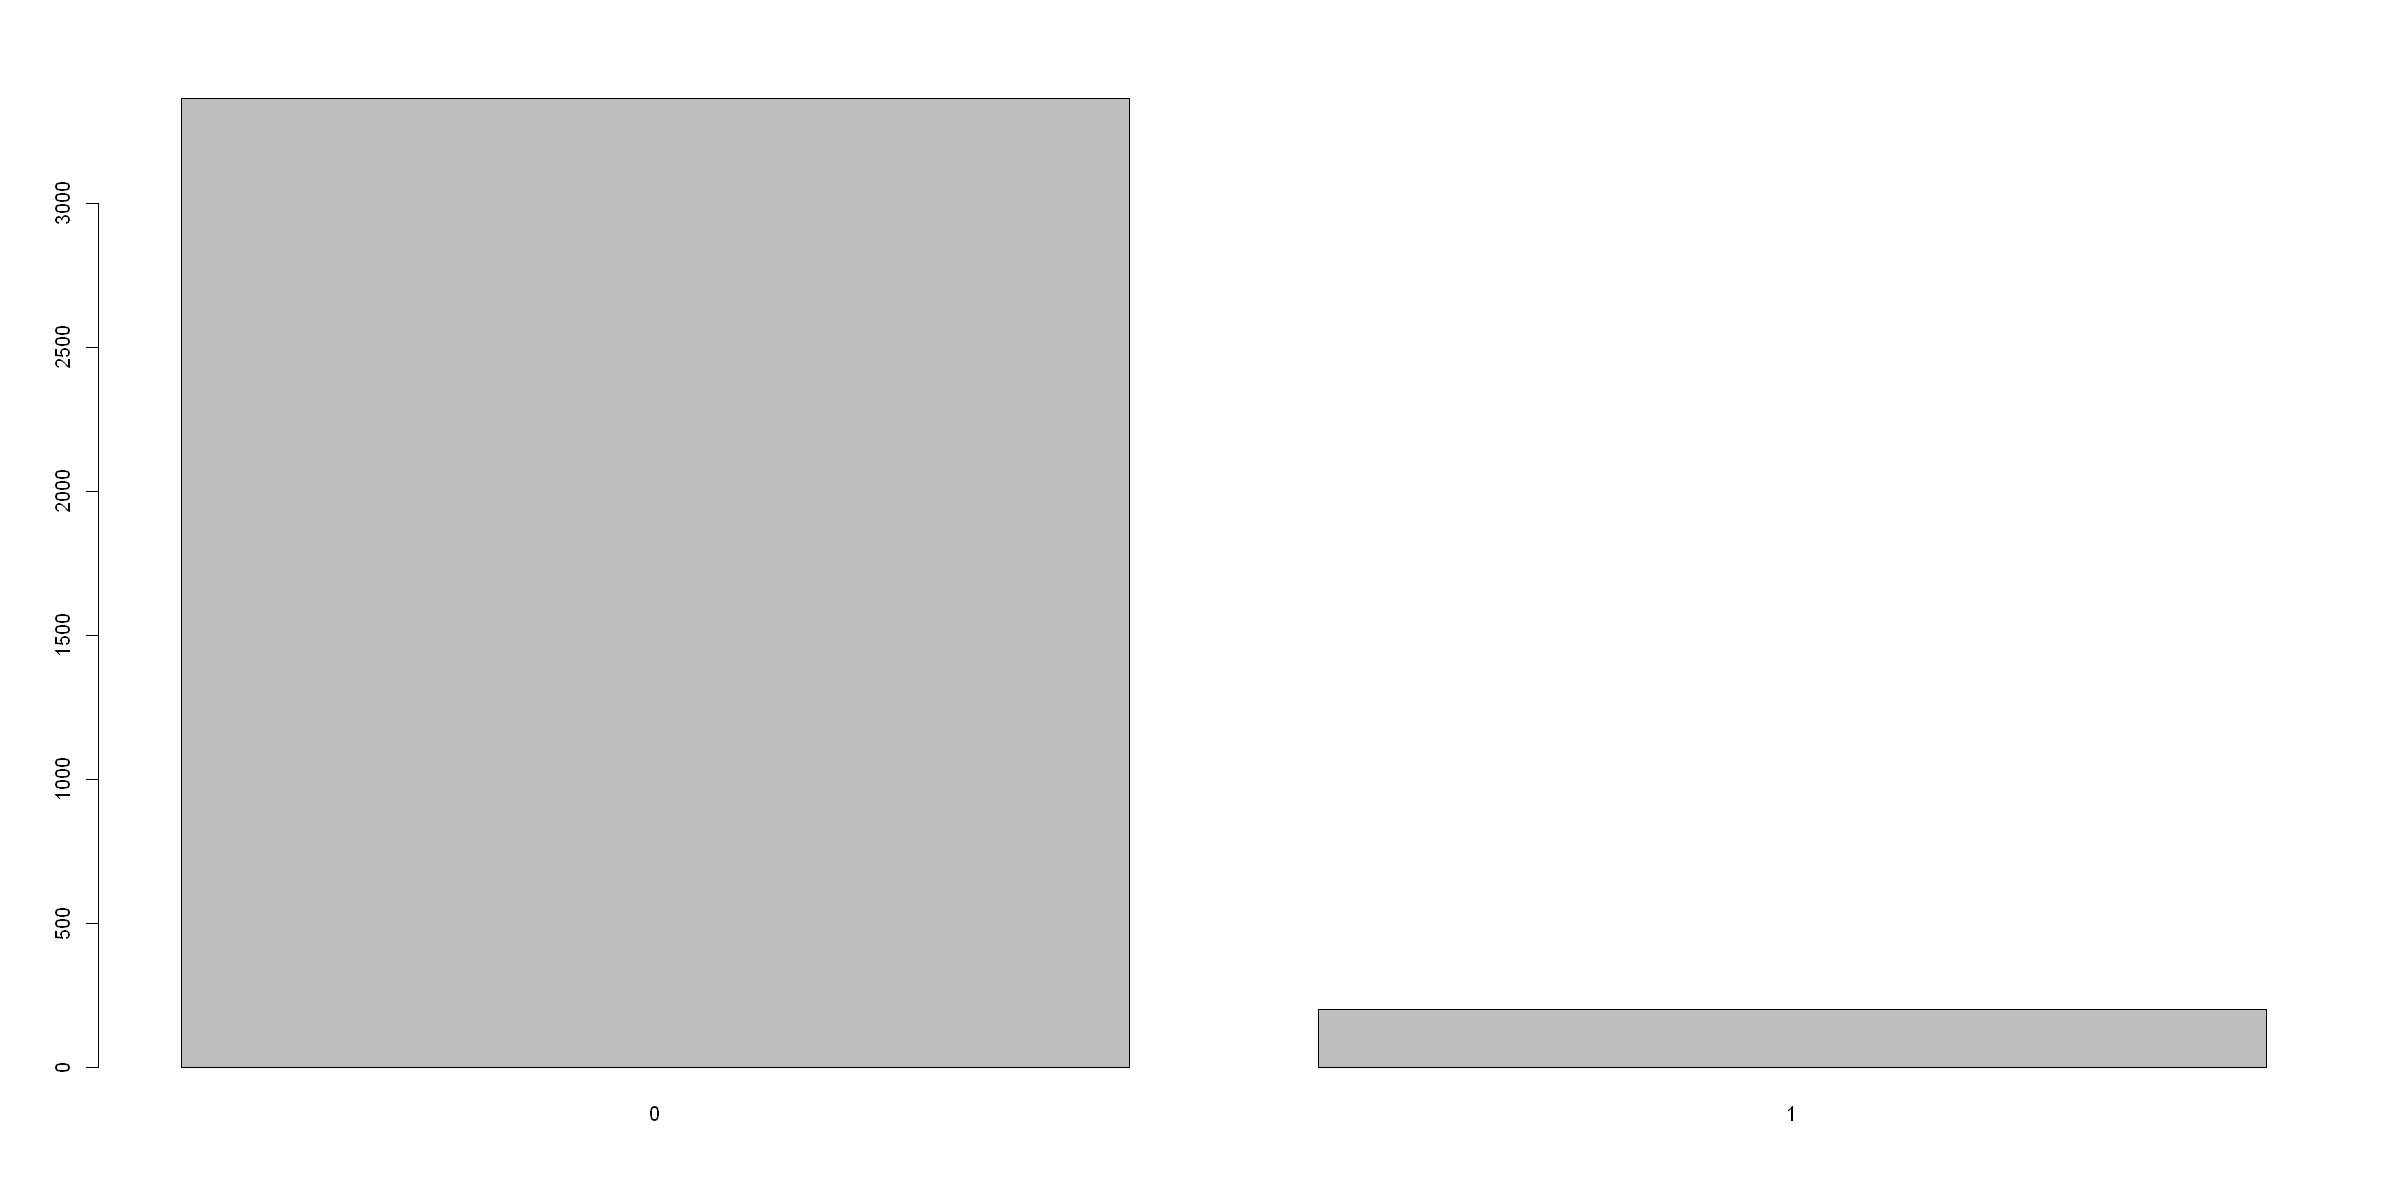

In [131]:
barplot(table(stroke_data2$stroke))

In [135]:
stroke_percentages <- prop.table(stroke_table) * 100
stroke_percentages


        0         1 
94.333801  5.666199 

   Cell Contents 
|-------------------------|
|                   Count | 
|-------------------------|

                             stroke_data2$stroke
stroke_data2$hypertension       0      1   Total
------------------------------------------------
0                            2979    140    3119
------------------------------------------------
1                             384     62     446
------------------------------------------------
Total                        3363    202    3565

Statistics for All Table Factors

Pearson's Chi-squared test 
------------------------------------------------------------
Chi^2 = 64.67888      d.f. = 1      p = 8.82e-16 

Pearson's Chi-squared test with Yates' continuity correction 
------------------------------------------------------------
Chi^2 = 62.92988      d.f. = 1      p = 2.14e-15 
        Minimum expected frequency: 25.27125 


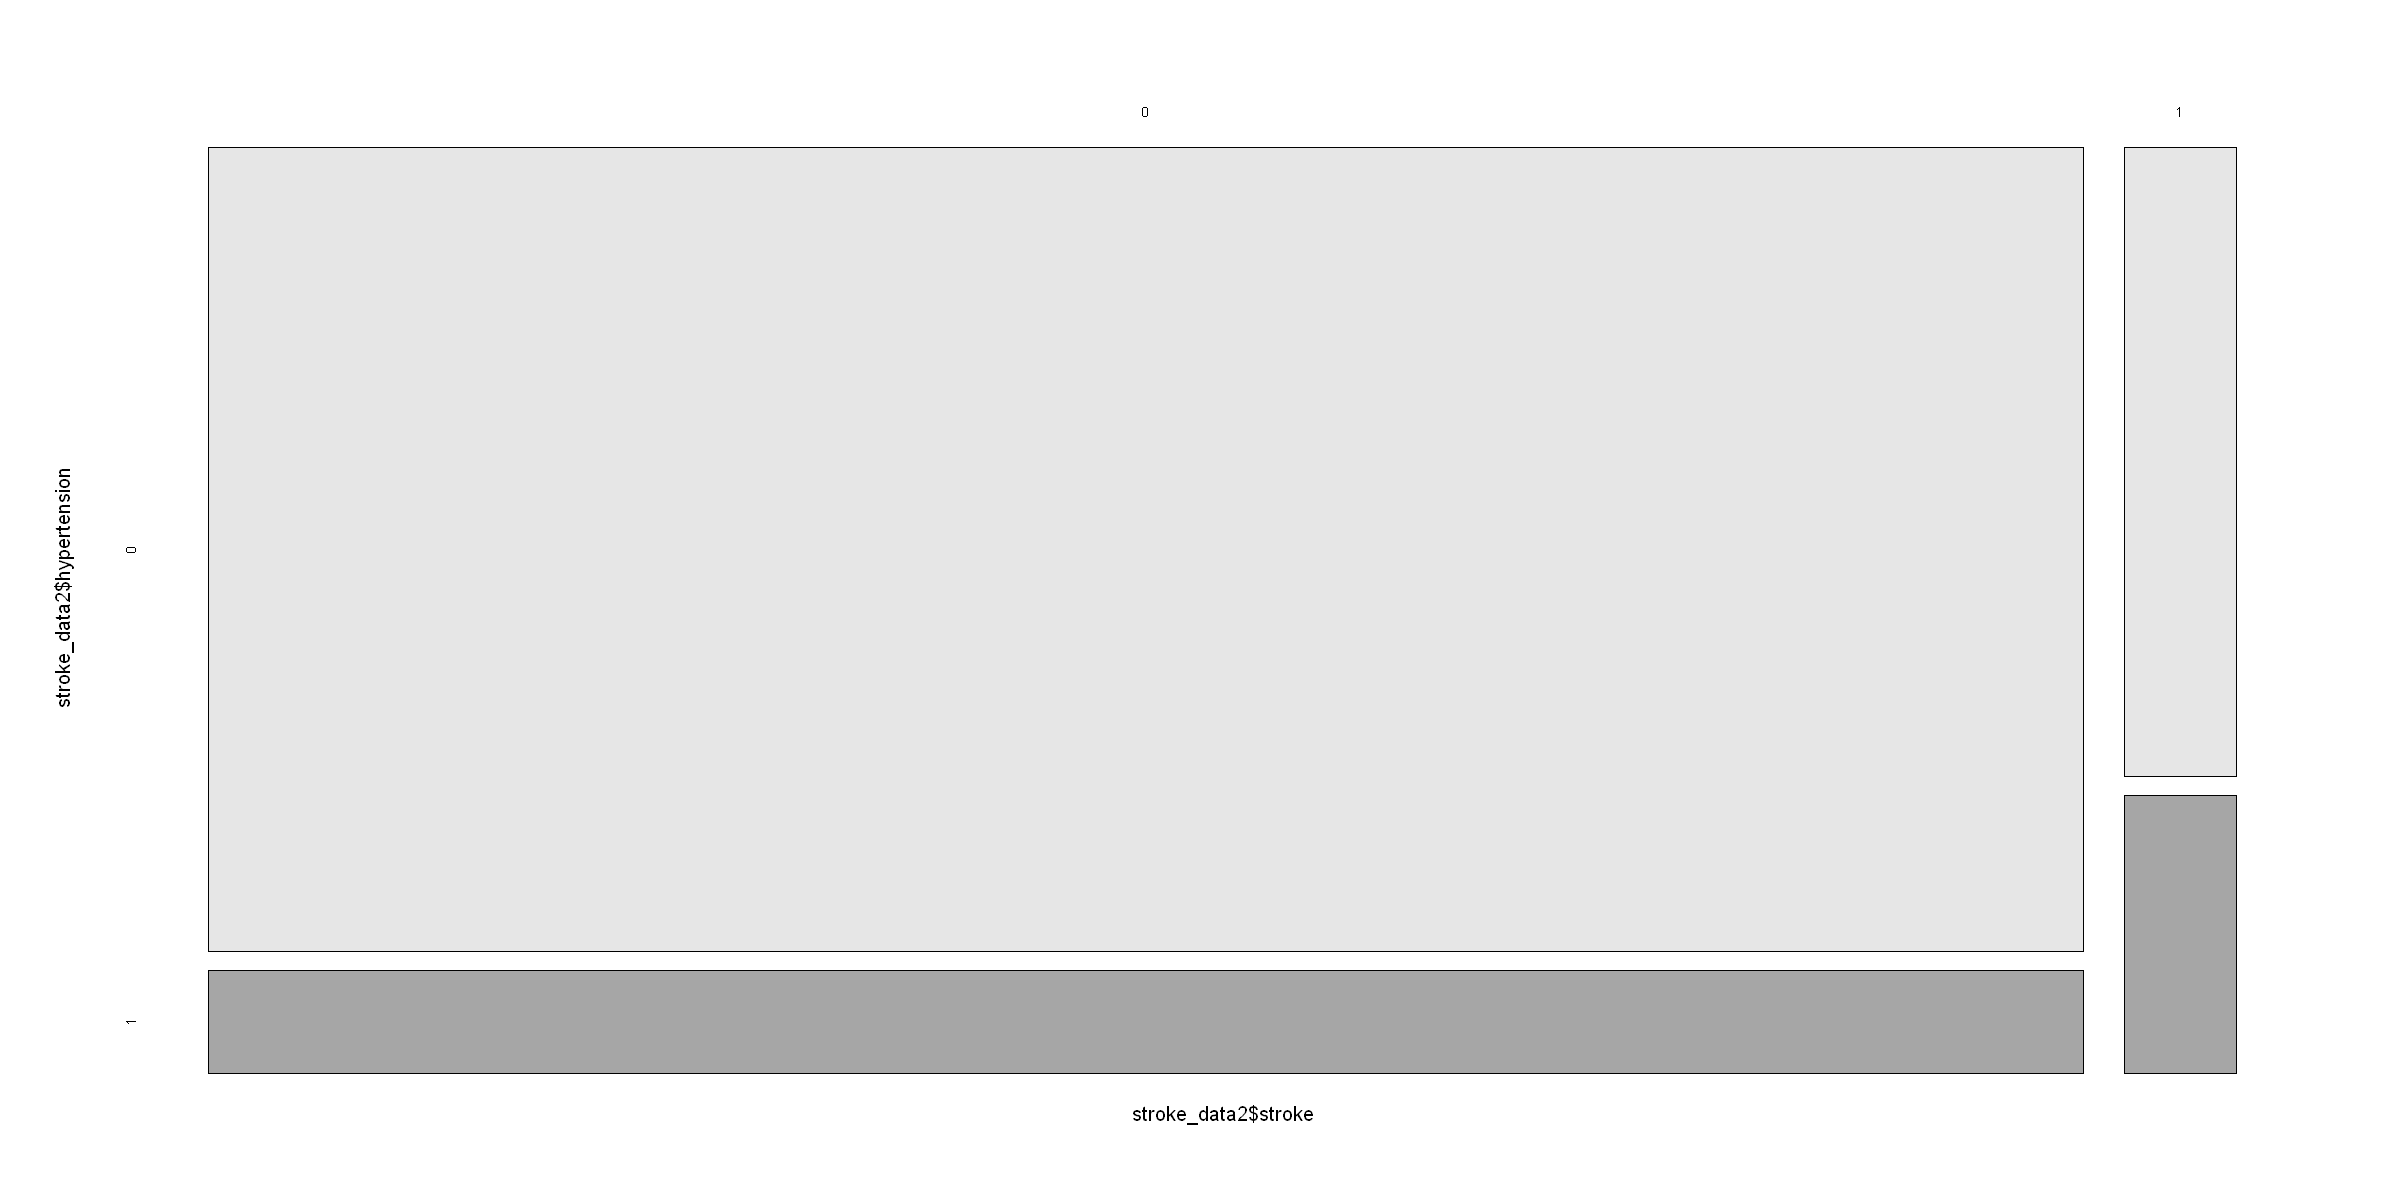

In [125]:
descr::crosstab(stroke_data2$hypertension, stroke_data2$stroke, chisq = TRUE)

   Cell Contents 
|-------------------------|
|                   Count | 
|-------------------------|

                              stroke_data2$stroke
stroke_data2$heart_disease       0      1   Total
-------------------------------------------------
0                             3174    163    3337
-------------------------------------------------
1                              189     39     228
-------------------------------------------------
Total                         3363    202    3565

Statistics for All Table Factors

Pearson's Chi-squared test 
------------------------------------------------------------
Chi^2 = 59.62934      d.f. = 1      p = 1.15e-14 

Pearson's Chi-squared test with Yates' continuity correction 
------------------------------------------------------------
Chi^2 = 57.36495      d.f. = 1      p = 3.62e-14 
        Minimum expected frequency: 12.91893 


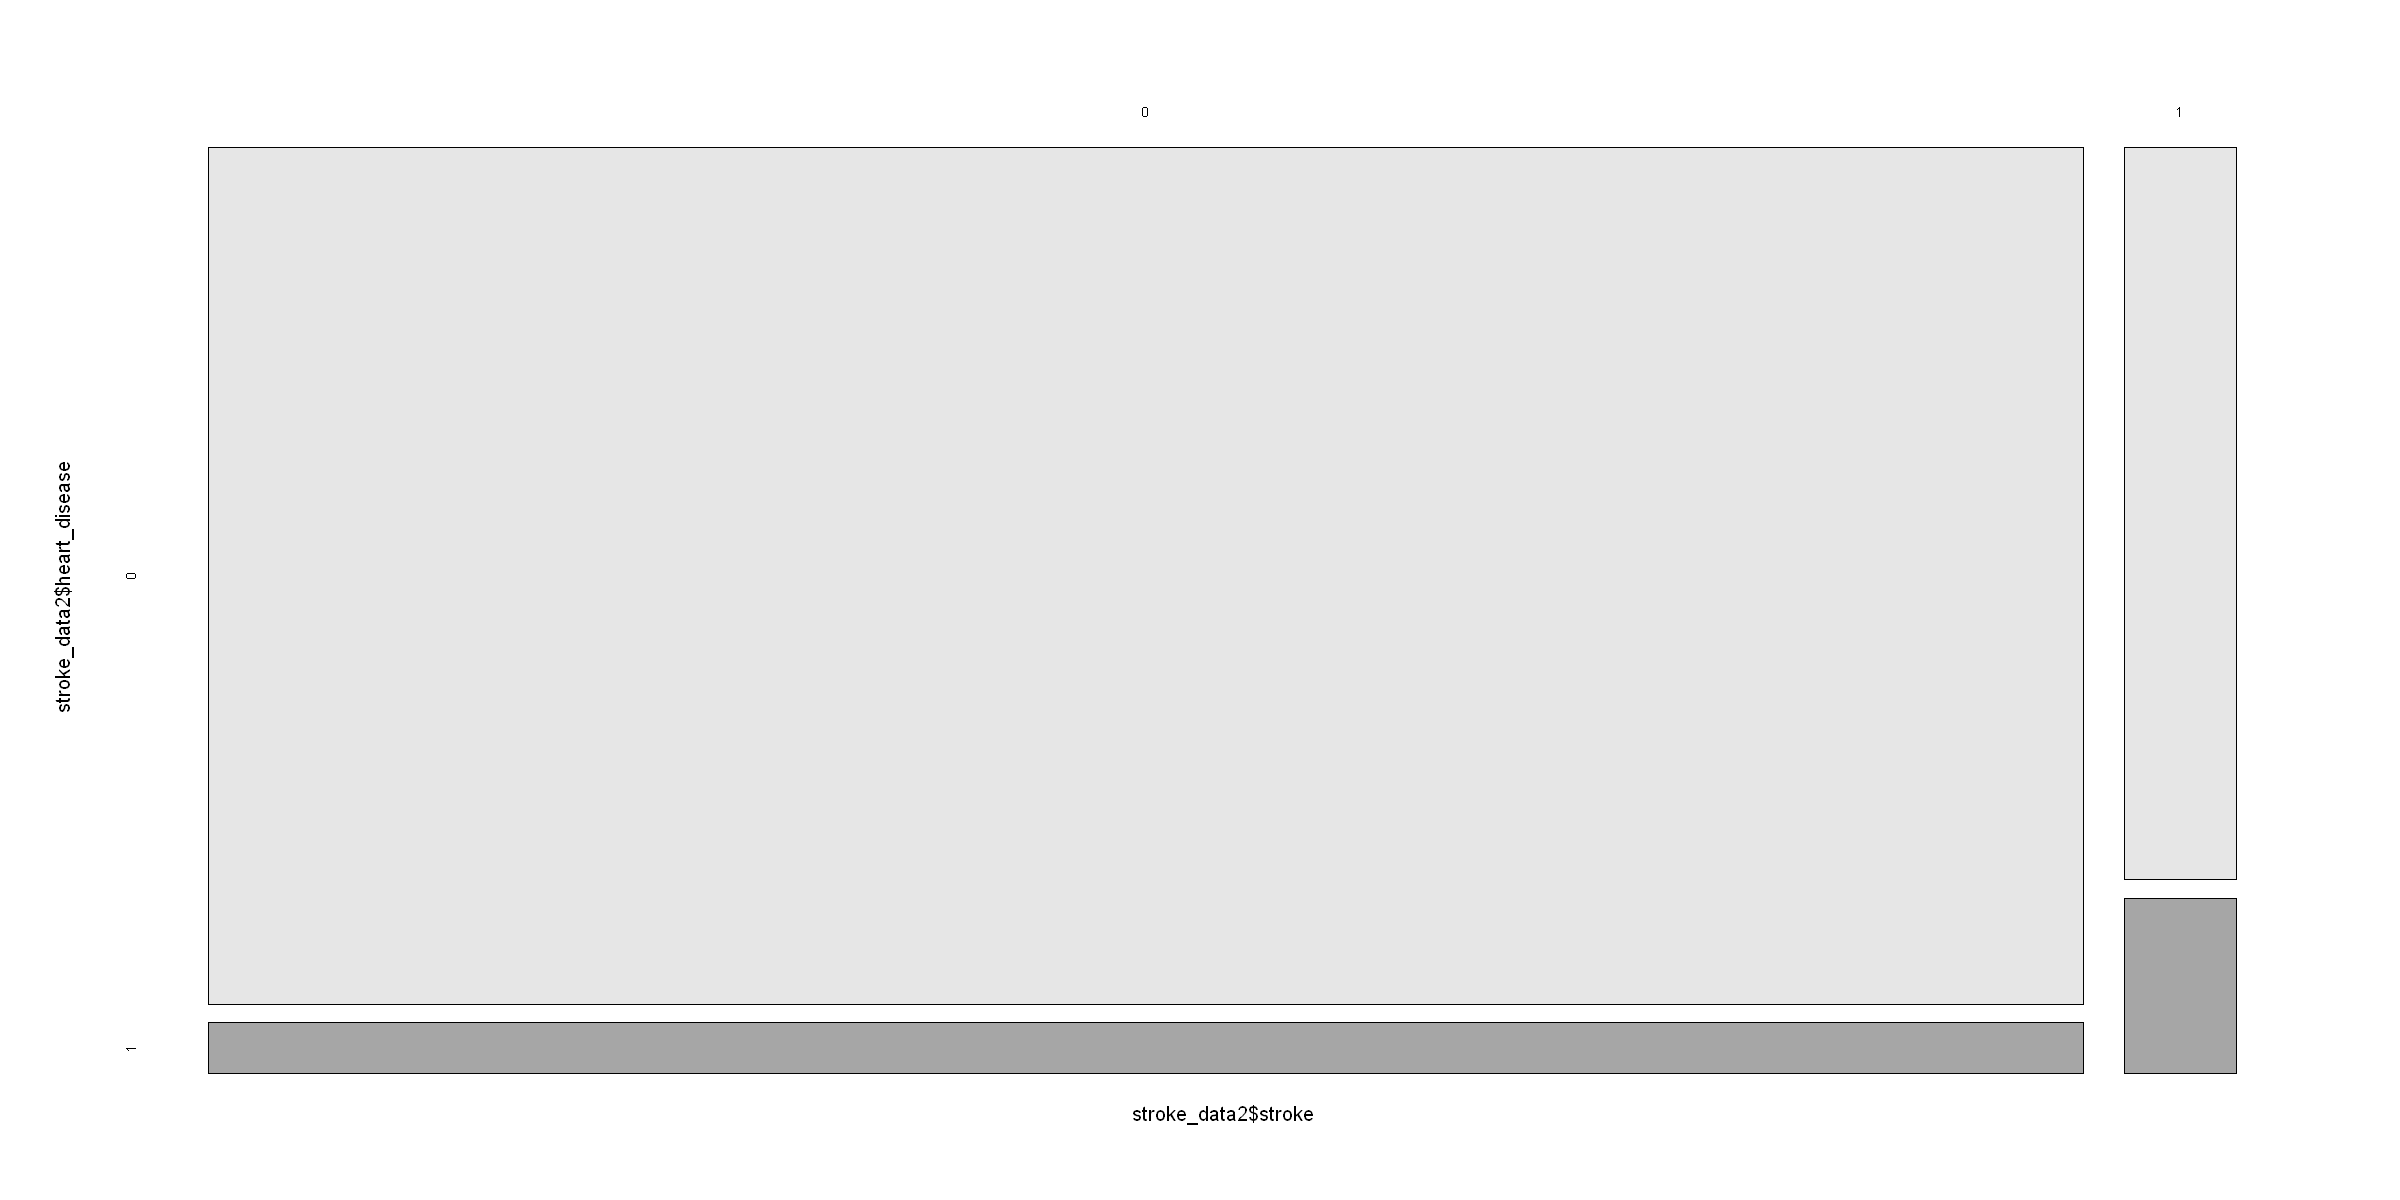

In [107]:
descr::crosstab(stroke_data2$heart_disease, stroke_data2$stroke, chisq = TRUE)

   Cell Contents 
|-------------------------|
|                   Count | 
|-------------------------|

                             stroke_data2$stroke
stroke_data2$ever_married       0      1   Total
------------------------------------------------
0                             834     21     855
------------------------------------------------
1                            2529    181    2710
------------------------------------------------
Total                        3363    202    3565

Statistics for All Table Factors

Pearson's Chi-squared test 
------------------------------------------------------------
Chi^2 = 21.68319      d.f. = 1      p = 3.22e-06 

Pearson's Chi-squared test with Yates' continuity correction 
------------------------------------------------------------
Chi^2 = 20.90035      d.f. = 1      p = 4.84e-06 
        Minimum expected frequency: 48.446 


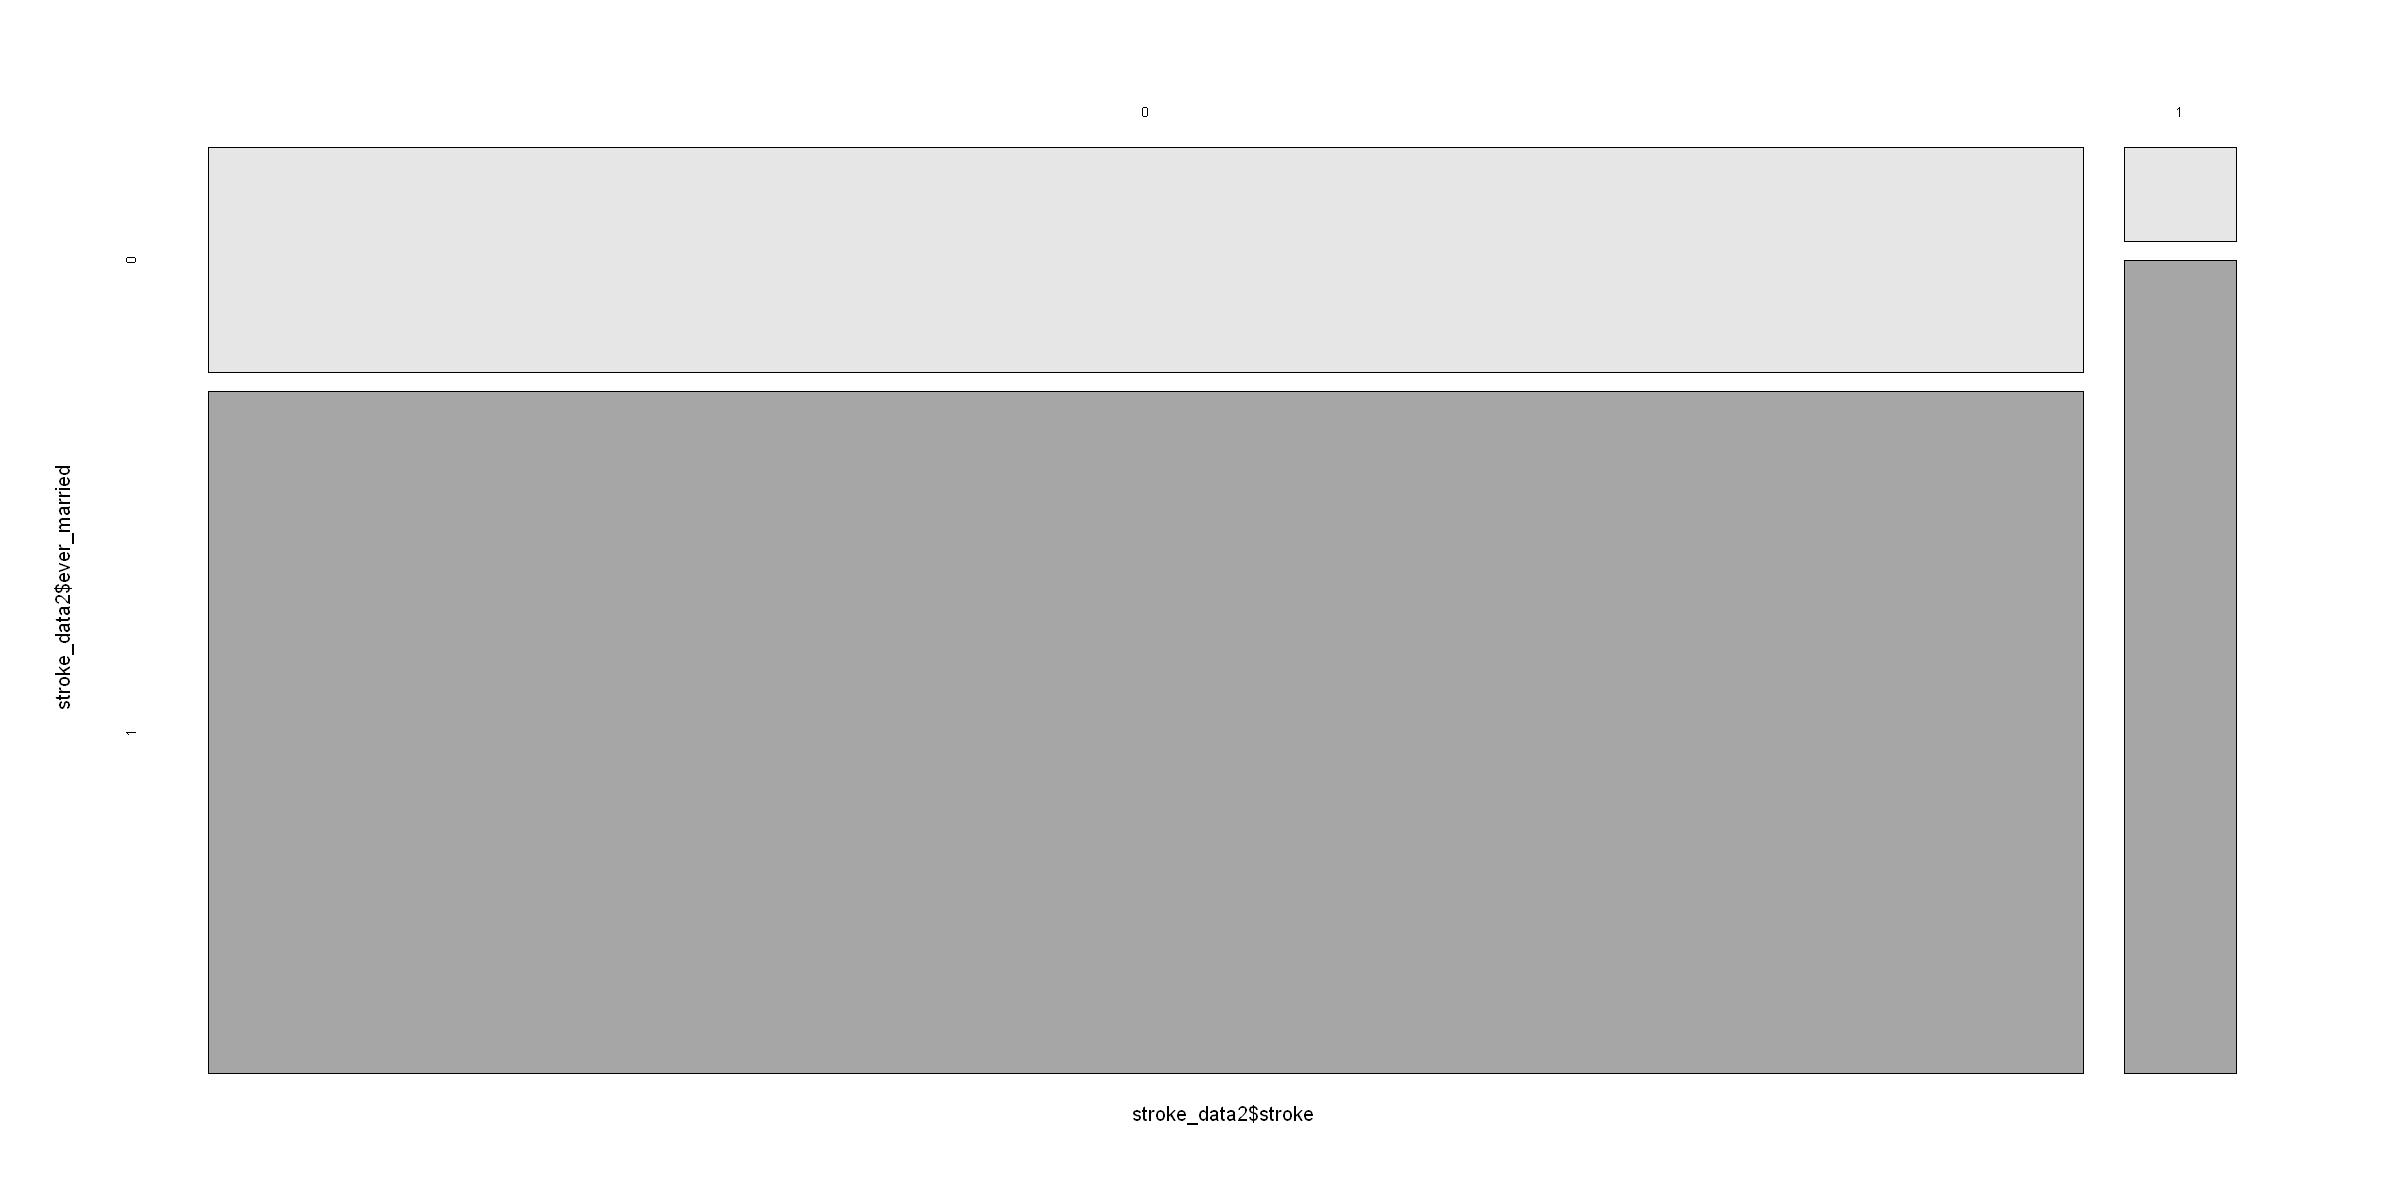

In [108]:
descr::crosstab(stroke_data2$ever_married, stroke_data2$stroke, chisq = TRUE)

After analyzing each significant variable in the cross-table, we observed that in all three instances, the Chi-square value is statistically significant and that the rectangle of individuals with both positive values is relatively low. In fact, even when analyzing the frequency of the stroke occurrence, we noticed that the percentage of individuals with a probability of stroke is only 6%. To further validate this findings, it would be necessary to collect additional data from individuals who have a probability of having a stroke. This additional data could improve the robustness of the results and help identify more accurate predictors of heart stroke.
